## libs

In [1]:
# python utils
import itertools
import inspect

# pre-processing and exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras import utils
from tensorflow.keras import regularizers, optimizers

## Import Data

In [27]:
df = pd.read_csv('datasets/breast_cancer_wisconsin.csv', header=0).drop('id', axis=1).drop('Unnamed: 32', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocessing Data

In [29]:
df['diagnosis'] = df['diagnosis'].factorize()[0]
df['diagnosis'] = df['diagnosis'].astype("category")
df.dtypes

diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

In [30]:
# split in input and output sets
input_df = df.drop("diagnosis", axis=1)
output_df = df["diagnosis"]

In [31]:
# normalizing values of input df between 0 and 1 (per column)
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

input_df = normalize(input_df)
input_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [32]:
# split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    input_df, output_df, test_size=0.15,
)

# One hot encode
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [33]:
print("X_train shape = {}".format(np.shape(X_train)))
print("y_train shape = {}".format(np.shape(y_train)))
print("X_test shape = {}".format(np.shape(X_test)))
print("y_test shape = {}".format(np.shape(y_test)))

X_train shape = (483, 30)
y_train shape = (483, 2)
X_test shape = (86, 30)
y_test shape = (86, 2)


## Model Builder

In [35]:
def mlp_momentum_l2_MSE_classifier_builder(
    input_layer, hidden_layers, output_layer, l2_value, momentum_beta
):
    model = Sequential()

    # first hidden layer
    model.add(
        Dense(
            hidden_layers[0],
            input_dim=input_layer,
            activation="relu",
            kernel_regularizer=regularizers.l2(l2_value),
            bias_regularizer=regularizers.l2(l2_value),
        )
    )

    # following hidden layers
    for hidden_layer in hidden_layers[1:]:
        model.add(
            Dense(
                hidden_layer,
                activation="relu",
                kernel_regularizer=regularizers.l2(l2_value),
                bias_regularizer=regularizers.l2(l2_value),
            )
        )

    # output layer
    model.add(Dense(output_layer, activation="softmax"))

    # create model
    model.compile(
        loss="mean_squared_error",
#         loss="categorical_crossentropy",
        optimizer=optimizers.SGD(learning_rate=0.01, momentum=momentum_beta),
#         optimizer='adam',
        metrics=["accuracy"],
    )

    return model


def build_models(builder_method, *args_tests):
    """
    Build models with all the combinations of the args_test passed
    """
    builder_args_names = list(inspect.signature(builder_method).parameters.keys())
    return [
        dict((("model", builder_method(*args)),) + tuple(zip(builder_args_names, args)))
        for args in itertools.product(*args_tests)
    ]

## Models Definition

In [36]:
# Parameters definition
input_layer_tests = [30]
hidden_layers_tests = [[4, 4], [32, 32], [128, 128]]
output_layer_tests = [2]
l2_value_tests = [0.1, 0.01, 0.001]
momentum_beta_tests = [0.8, 0.9, 0.99]

In [37]:
# building models with all the combinations of the test parameters
models = build_models(
    mlp_momentum_l2_MSE_classifier_builder,
    input_layer_tests,
    hidden_layers_tests,
    output_layer_tests,
    l2_value_tests,
    momentum_beta_tests,
)
models

[{'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbb1b494190>,
  'input_layer': 30,
  'hidden_layers': [4, 4],
  'output_layer': 2,
  'l2_value': 0.1,
  'momentum_beta': 0.8},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbb1b3e3a10>,
  'input_layer': 30,
  'hidden_layers': [4, 4],
  'output_layer': 2,
  'l2_value': 0.1,
  'momentum_beta': 0.9},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbb1b206fd0>,
  'input_layer': 30,
  'hidden_layers': [4, 4],
  'output_layer': 2,
  'l2_value': 0.1,
  'momentum_beta': 0.99},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbb1b230250>,
  'input_layer': 30,
  'hidden_layers': [4, 4],
  'output_layer': 2,
  'l2_value': 0.01,
  'momentum_beta': 0.8},
 {'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7fbb1afde050>,
  'input_layer': 30,
  'hidden_layers': [4, 4],
  'output_layer': 2,
  'l2_value': 0.01,
  'momentum_beta': 0.9},
 {'mode

## Models Training

In [38]:
for model in models:
    model["results"] = model["model"].fit(
        X_train, y_train, epochs=500, batch_size=25
    )
    _, model["train_acc"] = model["model"].evaluate(X_train, y_train, verbose=0)
    _, model["test_acc"] = model["model"].evaluate(X_test, y_test, verbose=0)

Train on 483 samples
Epoch 1/500
483/483 [==============================] - 0s 132us/sample - loss: 1.2264 - accuracy: 0.6356
Epoch 2/500
483/483 [==============================] - 0s 32us/sample - loss: 0.9027 - accuracy: 0.6356
Epoch 3/500
483/483 [==============================] - 0s 39us/sample - loss: 0.6721 - accuracy: 0.6356
Epoch 4/500
483/483 [==============================] - 0s 40us/sample - loss: 0.5210 - accuracy: 0.6356
Epoch 5/500
483/483 [==============================] - 0s 37us/sample - loss: 0.4217 - accuracy: 0.6356
Epoch 6/500
483/483 [==============================] - 0s 36us/sample - loss: 0.3567 - accuracy: 0.6356
Epoch 7/500
483/483 [==============================] - 0s 37us/sample - loss: 0.3140 - accuracy: 0.6356
Epoch 8/500
483/483 [==============================] - 0s 38us/sample - loss: 0.2859 - accuracy: 0.6356
Epoch 9/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2672 - accuracy: 0.6356
Epoch 10/500
483/483 [====================

483/483 [==============================] - 0s 41us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 78/500
483/483 [==============================] - 0s 39us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 79/500
483/483 [==============================] - 0s 39us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 80/500
483/483 [==============================] - 0s 40us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 81/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 82/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 83/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 84/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 85/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 86/500
483/483 [==============================] - 0s 34us/samp

483/483 [==============================] - 0s 36us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 155/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 156/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 157/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 158/500
483/483 [==============================] - 0s 39us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 159/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 160/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 161/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 162/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 163/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 36us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 232/500
483/483 [==============================] - 0s 38us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 233/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 234/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 235/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 236/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 237/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 238/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 239/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 240/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 36us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 309/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 310/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 311/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 312/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 313/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 314/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 315/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 316/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 317/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 36us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 386/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 387/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 388/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 389/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 390/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 391/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 392/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 393/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 394/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 463/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 464/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 465/500
483/483 [==============================] - 0s 32us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 466/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 467/500
483/483 [==============================] - 0s 32us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 468/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 469/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 470/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 471/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 35/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 36/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 37/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 38/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 39/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 40/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 41/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 42/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 43/500
483/483 [==============================] - 0s 35us/samp

483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 112/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 113/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 114/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 115/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 116/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2320 - accuracy: 0.6356
Epoch 117/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 118/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 119/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 120/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 188/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 189/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 190/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 191/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 192/500
483/483 [==============================] - 0s 32us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 193/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 194/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 195/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2319 - accuracy: 0.6356
Epoch 196/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 265/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 266/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 267/500
483/483 [==============================] - 0s 32us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 268/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 269/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 270/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 271/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 272/500
483/483 [==============================] - 0s 32us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 273/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 36us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 342/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 343/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 344/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 345/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 346/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 347/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 348/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 349/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 350/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 39us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 419/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 420/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 421/500
483/483 [==============================] - 0s 38us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 422/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 423/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 424/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 425/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 426/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 427/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 40us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 496/500
483/483 [==============================] - 0s 38us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 497/500
483/483 [==============================] - 0s 41us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 498/500
483/483 [==============================] - 0s 39us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 499/500
483/483 [==============================] - 0s 40us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 500/500
483/483 [==============================] - 0s 40us/sample - loss: 0.2317 - accuracy: 0.6356
Train on 483 samples
Epoch 1/500
483/483 [==============================] - 0s 131us/sample - loss: 0.9830 - accuracy: 0.6418
Epoch 2/500
483/483 [==============================] - 0s 34us/sample - loss: 0.3618 - accuracy: 0.6356
Epoch 3/500
483/483 [==============================] - 0s 35us/sample - loss: 0.3906 - accuracy: 0.6356
Epoch 4/500
483/483 [=======================

483/483 [==============================] - 0s 38us/sample - loss: 0.1837 - accuracy: 0.8696
Epoch 69/500
483/483 [==============================] - 0s 40us/sample - loss: 0.1764 - accuracy: 0.8282
Epoch 70/500
483/483 [==============================] - 0s 36us/sample - loss: 0.1560 - accuracy: 0.8634
Epoch 71/500
483/483 [==============================] - 0s 36us/sample - loss: 0.1504 - accuracy: 0.9089
Epoch 72/500
483/483 [==============================] - 0s 36us/sample - loss: 0.1368 - accuracy: 0.9627
Epoch 73/500
483/483 [==============================] - 0s 35us/sample - loss: 0.1215 - accuracy: 0.9441
Epoch 74/500
483/483 [==============================] - 0s 35us/sample - loss: 0.1354 - accuracy: 0.8986
Epoch 75/500
483/483 [==============================] - 0s 36us/sample - loss: 0.1524 - accuracy: 0.8841
Epoch 76/500
483/483 [==============================] - 0s 36us/sample - loss: 0.1494 - accuracy: 0.9234
Epoch 77/500
483/483 [==============================] - 0s 36us/samp

483/483 [==============================] - 0s 33us/sample - loss: 0.2391 - accuracy: 0.6356
Epoch 146/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2494 - accuracy: 0.6356
Epoch 147/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2402 - accuracy: 0.6356
Epoch 148/500
483/483 [==============================] - 0s 33us/sample - loss: 0.2355 - accuracy: 0.6356
Epoch 149/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2380 - accuracy: 0.6356
Epoch 150/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2401 - accuracy: 0.6356
Epoch 151/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2343 - accuracy: 0.6356
Epoch 152/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2338 - accuracy: 0.6356
Epoch 153/500
483/483 [==============================] - 0s 36us/sample - loss: 0.2349 - accuracy: 0.6356
Epoch 154/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 32us/sample - loss: 0.2352 - accuracy: 0.6356
Epoch 222/500
483/483 [==============================] - 0s 31us/sample - loss: 0.2375 - accuracy: 0.6356
Epoch 223/500
483/483 [==============================] - 0s 32us/sample - loss: 0.2349 - accuracy: 0.6356
Epoch 224/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2356 - accuracy: 0.6356
Epoch 225/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2377 - accuracy: 0.6356
Epoch 226/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2417 - accuracy: 0.6356
Epoch 227/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2361 - accuracy: 0.6356
Epoch 228/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2387 - accuracy: 0.5880
Epoch 229/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2632 - accuracy: 0.6356
Epoch 230/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 34us/sample - loss: 0.2369 - accuracy: 0.5921
Epoch 299/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2424 - accuracy: 0.6356
Epoch 300/500
483/483 [==============================] - 0s 38us/sample - loss: 0.2585 - accuracy: 0.6356
Epoch 301/500
483/483 [==============================] - 0s 34us/sample - loss: 0.2444 - accuracy: 0.6356
Epoch 302/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2346 - accuracy: 0.6356
Epoch 303/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2395 - accuracy: 0.6356
Epoch 304/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2463 - accuracy: 0.6356
Epoch 305/500
483/483 [==============================] - 0s 40us/sample - loss: 0.2382 - accuracy: 0.6356
Epoch 306/500
483/483 [==============================] - 0s 37us/sample - loss: 0.2357 - accuracy: 0.6025
Epoch 307/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.2332 - accuracy: 0.6356
Epoch 376/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2336 - accuracy: 0.6356
Epoch 377/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2370 - accuracy: 0.6356
Epoch 378/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2363 - accuracy: 0.6356
Epoch 379/500
483/483 [==============================] - 0s 41us/sample - loss: 0.2341 - accuracy: 0.6356
Epoch 380/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2362 - accuracy: 0.6356
Epoch 381/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2500 - accuracy: 0.6356
Epoch 382/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2439 - accuracy: 0.6356
Epoch 383/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2349 - accuracy: 0.6356
Epoch 384/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.2341 - accuracy: 0.6356
Epoch 453/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2325 - accuracy: 0.6356
Epoch 454/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2325 - accuracy: 0.6356
Epoch 455/500
483/483 [==============================] - 0s 41us/sample - loss: 0.2342 - accuracy: 0.6356
Epoch 456/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2337 - accuracy: 0.6356
Epoch 457/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2343 - accuracy: 0.6356
Epoch 458/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2373 - accuracy: 0.6356
Epoch 459/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2511 - accuracy: 0.6356
Epoch 460/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2427 - accuracy: 0.6356
Epoch 461/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 39us/sample - loss: 0.1463 - accuracy: 0.9462
Epoch 25/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1428 - accuracy: 0.9441
Epoch 26/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1388 - accuracy: 0.9482
Epoch 27/500
483/483 [==============================] - 0s 40us/sample - loss: 0.1359 - accuracy: 0.9441
Epoch 28/500
483/483 [==============================] - 0s 39us/sample - loss: 0.1329 - accuracy: 0.9400
Epoch 29/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1304 - accuracy: 0.9462
Epoch 30/500
483/483 [==============================] - 0s 41us/sample - loss: 0.1294 - accuracy: 0.9503
Epoch 31/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1259 - accuracy: 0.9503
Epoch 32/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1238 - accuracy: 0.9503
Epoch 33/500
483/483 [==============================] - 0s 41us/samp

483/483 [==============================] - 0s 43us/sample - loss: 0.0767 - accuracy: 0.9814
Epoch 102/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0763 - accuracy: 0.9814
Epoch 103/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0771 - accuracy: 0.9752
Epoch 104/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0762 - accuracy: 0.9814
Epoch 105/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0761 - accuracy: 0.9752
Epoch 106/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0760 - accuracy: 0.9814
Epoch 107/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0752 - accuracy: 0.9834
Epoch 108/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0754 - accuracy: 0.9731
Epoch 109/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0747 - accuracy: 0.9814
Epoch 110/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0661 - accuracy: 0.9855
Epoch 179/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0663 - accuracy: 0.9814
Epoch 180/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0656 - accuracy: 0.9834
Epoch 181/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0665 - accuracy: 0.9814
Epoch 182/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0657 - accuracy: 0.9855
Epoch 183/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0669 - accuracy: 0.9752
Epoch 184/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0657 - accuracy: 0.9834
Epoch 185/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0656 - accuracy: 0.9793
Epoch 186/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0665 - accuracy: 0.9855
Epoch 187/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.0611 - accuracy: 0.9814
Epoch 256/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0607 - accuracy: 0.9814
Epoch 257/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0610 - accuracy: 0.9793
Epoch 258/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0611 - accuracy: 0.9834
Epoch 259/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0607 - accuracy: 0.9834
Epoch 260/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0610 - accuracy: 0.9834
Epoch 261/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0607 - accuracy: 0.9834
Epoch 262/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0613 - accuracy: 0.9814
Epoch 263/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0606 - accuracy: 0.9834
Epoch 264/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 55us/sample - loss: 0.0574 - accuracy: 0.9834
Epoch 333/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0572 - accuracy: 0.9855
Epoch 334/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0580 - accuracy: 0.9814
Epoch 335/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0576 - accuracy: 0.9814
Epoch 336/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0574 - accuracy: 0.9834
Epoch 337/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0573 - accuracy: 0.9834
Epoch 338/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0572 - accuracy: 0.9834
Epoch 339/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0573 - accuracy: 0.9834
Epoch 340/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0574 - accuracy: 0.9814
Epoch 341/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0547 - accuracy: 0.9814
Epoch 410/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0552 - accuracy: 0.9834
Epoch 411/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0553 - accuracy: 0.9855
Epoch 412/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0555 - accuracy: 0.9814
Epoch 413/500
483/483 [==============================] - 0s 39us/sample - loss: 0.0552 - accuracy: 0.9834
Epoch 414/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0553 - accuracy: 0.9834
Epoch 415/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0554 - accuracy: 0.9855
Epoch 416/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0543 - accuracy: 0.9793
Epoch 417/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0544 - accuracy: 0.9855
Epoch 418/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 48us/sample - loss: 0.0539 - accuracy: 0.9772
Epoch 487/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0528 - accuracy: 0.9834
Epoch 488/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0524 - accuracy: 0.9855
Epoch 489/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0528 - accuracy: 0.9814
Epoch 490/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0532 - accuracy: 0.9855
Epoch 491/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0531 - accuracy: 0.9834
Epoch 492/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0528 - accuracy: 0.9855
Epoch 493/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0527 - accuracy: 0.9855
Epoch 494/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0525 - accuracy: 0.9834
Epoch 495/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 54us/sample - loss: 0.0764 - accuracy: 0.9814
Epoch 59/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0756 - accuracy: 0.9793
Epoch 60/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0798 - accuracy: 0.9648
Epoch 61/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0753 - accuracy: 0.9814
Epoch 62/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0756 - accuracy: 0.9772
Epoch 63/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0753 - accuracy: 0.9752
Epoch 64/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0744 - accuracy: 0.9814
Epoch 65/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0736 - accuracy: 0.9834
Epoch 66/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0732 - accuracy: 0.9793
Epoch 67/500
483/483 [==============================] - 0s 50us/samp

483/483 [==============================] - 0s 50us/sample - loss: 0.0627 - accuracy: 0.9772
Epoch 136/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0631 - accuracy: 0.9814
Epoch 137/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0616 - accuracy: 0.9834
Epoch 138/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0640 - accuracy: 0.9793
Epoch 139/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0634 - accuracy: 0.9731
Epoch 140/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0623 - accuracy: 0.9772
Epoch 141/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0607 - accuracy: 0.9814
Epoch 142/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0614 - accuracy: 0.9855
Epoch 143/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0615 - accuracy: 0.9772
Epoch 144/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0578 - accuracy: 0.9772
Epoch 213/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0581 - accuracy: 0.9793
Epoch 214/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0616 - accuracy: 0.9689
Epoch 215/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0573 - accuracy: 0.9834
Epoch 216/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0573 - accuracy: 0.9814
Epoch 217/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0590 - accuracy: 0.9772
Epoch 218/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0574 - accuracy: 0.9772
Epoch 219/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0565 - accuracy: 0.9793
Epoch 220/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0561 - accuracy: 0.9855
Epoch 221/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.0529 - accuracy: 0.9855
Epoch 290/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0523 - accuracy: 0.9814
Epoch 291/500
483/483 [==============================] - 0s 39us/sample - loss: 0.0537 - accuracy: 0.9772
Epoch 292/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0525 - accuracy: 0.9834
Epoch 293/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0526 - accuracy: 0.9834
Epoch 294/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0524 - accuracy: 0.9855
Epoch 295/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0521 - accuracy: 0.9855
Epoch 296/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0535 - accuracy: 0.9793
Epoch 297/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0549 - accuracy: 0.9834
Epoch 298/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0516 - accuracy: 0.9855
Epoch 367/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0515 - accuracy: 0.9752
Epoch 368/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0515 - accuracy: 0.9793
Epoch 369/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0517 - accuracy: 0.9772
Epoch 370/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0520 - accuracy: 0.9731
Epoch 371/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0534 - accuracy: 0.9731
Epoch 372/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0549 - accuracy: 0.9689
Epoch 373/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0572 - accuracy: 0.9710
Epoch 374/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0493 - accuracy: 0.9834
Epoch 375/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0478 - accuracy: 0.9855
Epoch 444/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0493 - accuracy: 0.9855
Epoch 445/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0483 - accuracy: 0.9855
Epoch 446/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0509 - accuracy: 0.9752
Epoch 447/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0493 - accuracy: 0.9834
Epoch 448/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0502 - accuracy: 0.9834
Epoch 449/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0514 - accuracy: 0.9731
Epoch 450/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0515 - accuracy: 0.9793
Epoch 451/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0488 - accuracy: 0.9814
Epoch 452/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 51us/sample - loss: 0.0743 - accuracy: 0.9586
Epoch 16/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0738 - accuracy: 0.9545
Epoch 17/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0668 - accuracy: 0.9689
Epoch 18/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0645 - accuracy: 0.9607
Epoch 19/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0683 - accuracy: 0.9420
Epoch 20/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0854 - accuracy: 0.9172
Epoch 21/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0846 - accuracy: 0.9255
Epoch 22/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0902 - accuracy: 0.9130
Epoch 23/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0800 - accuracy: 0.9296
Epoch 24/500
483/483 [==============================] - 0s 45us/samp

483/483 [==============================] - 0s 43us/sample - loss: 0.0527 - accuracy: 0.9731
Epoch 93/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0622 - accuracy: 0.9400
Epoch 94/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0786 - accuracy: 0.9110
Epoch 95/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0753 - accuracy: 0.9317
Epoch 96/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1024 - accuracy: 0.9089
Epoch 97/500
483/483 [==============================] - 0s 40us/sample - loss: 0.1002 - accuracy: 0.9151
Epoch 98/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0870 - accuracy: 0.9400
Epoch 99/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0763 - accuracy: 0.9565
Epoch 100/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0715 - accuracy: 0.9586
Epoch 101/500
483/483 [==============================] - 0s 43us/sa

483/483 [==============================] - 0s 45us/sample - loss: 0.0938 - accuracy: 0.9275
Epoch 170/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0983 - accuracy: 0.9213
Epoch 171/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0917 - accuracy: 0.9441
Epoch 172/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0797 - accuracy: 0.9462
Epoch 173/500
483/483 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.96 - 0s 44us/sample - loss: 0.0858 - accuracy: 0.9337
Epoch 174/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0705 - accuracy: 0.9503
Epoch 175/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0565 - accuracy: 0.9627
Epoch 176/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0584 - accuracy: 0.9545
Epoch 177/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0487 - accuracy: 0.9731
Epoch 178/500
483/

483/483 [==============================] - 0s 43us/sample - loss: 0.0744 - accuracy: 0.9400
Epoch 247/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0610 - accuracy: 0.9648
Epoch 248/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0515 - accuracy: 0.9689
Epoch 249/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0533 - accuracy: 0.9648
Epoch 250/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0681 - accuracy: 0.9275
Epoch 251/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0559 - accuracy: 0.9669
Epoch 252/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0537 - accuracy: 0.9648
Epoch 253/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0506 - accuracy: 0.9752
Epoch 254/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0457 - accuracy: 0.9793
Epoch 255/500
483/483 [==============================] - ETA

483/483 [==============================] - 0s 43us/sample - loss: 0.1093 - accuracy: 0.9027
Epoch 324/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1095 - accuracy: 0.9193
Epoch 325/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1254 - accuracy: 0.9068
Epoch 326/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0926 - accuracy: 0.9420
Epoch 327/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0900 - accuracy: 0.9400
Epoch 328/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0731 - accuracy: 0.9420
Epoch 329/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0613 - accuracy: 0.9648
Epoch 330/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0696 - accuracy: 0.9400
Epoch 331/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0704 - accuracy: 0.9420
Epoch 332/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0482 - accuracy: 0.9752
Epoch 401/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0452 - accuracy: 0.9834
Epoch 402/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0521 - accuracy: 0.9607
Epoch 403/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0565 - accuracy: 0.9565
Epoch 404/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0789 - accuracy: 0.9234
Epoch 405/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1382 - accuracy: 0.8489
Epoch 406/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0647 - accuracy: 0.9524
Epoch 407/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0785 - accuracy: 0.9441
Epoch 408/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0640 - accuracy: 0.9648
Epoch 409/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.1084 - accuracy: 0.9213
Epoch 478/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1042 - accuracy: 0.9255
Epoch 479/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1134 - accuracy: 0.9068
Epoch 480/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1040 - accuracy: 0.9130
Epoch 481/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0946 - accuracy: 0.9151
Epoch 482/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1063 - accuracy: 0.8965
Epoch 483/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0952 - accuracy: 0.9193
Epoch 484/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0983 - accuracy: 0.9130
Epoch 485/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0973 - accuracy: 0.9151
Epoch 486/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0871 - accuracy: 0.9379
Epoch 50/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0850 - accuracy: 0.9358
Epoch 51/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0832 - accuracy: 0.9462
Epoch 52/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0814 - accuracy: 0.9358
Epoch 53/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0797 - accuracy: 0.9482
Epoch 54/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0780 - accuracy: 0.9400
Epoch 55/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0765 - accuracy: 0.9503
Epoch 56/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0749 - accuracy: 0.9524
Epoch 57/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0735 - accuracy: 0.9503
Epoch 58/500
483/483 [==============================] - 0s 41us/samp

483/483 [==============================] - 0s 45us/sample - loss: 0.0399 - accuracy: 0.9793
Epoch 127/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0396 - accuracy: 0.9834
Epoch 128/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0398 - accuracy: 0.9772
Epoch 129/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0397 - accuracy: 0.9772
Epoch 130/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0393 - accuracy: 0.9793
Epoch 131/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0390 - accuracy: 0.9814
Epoch 132/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0391 - accuracy: 0.9814
Epoch 133/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0391 - accuracy: 0.9793
Epoch 134/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0389 - accuracy: 0.9814
Epoch 135/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.0328 - accuracy: 0.9855
Epoch 204/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0328 - accuracy: 0.9834
Epoch 205/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0330 - accuracy: 0.9834
Epoch 206/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0328 - accuracy: 0.9855
Epoch 207/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0326 - accuracy: 0.9834
Epoch 208/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0329 - accuracy: 0.9855
Epoch 209/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0326 - accuracy: 0.9834
Epoch 210/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0327 - accuracy: 0.9834
Epoch 211/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0325 - accuracy: 0.9855
Epoch 212/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 42us/sample - loss: 0.0297 - accuracy: 0.9855
Epoch 281/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0297 - accuracy: 0.9834
Epoch 282/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0305 - accuracy: 0.9814
Epoch 283/500
483/483 [==============================] - 0s 60us/sample - loss: 0.0297 - accuracy: 0.9855
Epoch 284/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0307 - accuracy: 0.9834
Epoch 285/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0301 - accuracy: 0.9834
Epoch 286/500
483/483 [==============================] - 0s 38us/sample - loss: 0.0299 - accuracy: 0.9834
Epoch 287/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0297 - accuracy: 0.9855
Epoch 288/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0297 - accuracy: 0.9855
Epoch 289/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0284 - accuracy: 0.9876
Epoch 358/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0279 - accuracy: 0.9855
Epoch 359/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0279 - accuracy: 0.9855
Epoch 360/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0278 - accuracy: 0.9834
Epoch 361/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0277 - accuracy: 0.9855
Epoch 362/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0281 - accuracy: 0.9834
Epoch 363/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0277 - accuracy: 0.9855
Epoch 364/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0278 - accuracy: 0.9876
Epoch 365/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0280 - accuracy: 0.9855
Epoch 366/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.0264 - accuracy: 0.9855
Epoch 435/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0263 - accuracy: 0.9855
Epoch 436/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0265 - accuracy: 0.9855
Epoch 437/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0261 - accuracy: 0.9855
Epoch 438/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0264 - accuracy: 0.9855
Epoch 439/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0263 - accuracy: 0.9876
Epoch 440/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0263 - accuracy: 0.9855
Epoch 441/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0263 - accuracy: 0.9855
Epoch 442/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0266 - accuracy: 0.9855
Epoch 443/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 36us/sample - loss: 0.1672 - accuracy: 0.7433
Epoch 7/500
483/483 [==============================] - 0s 38us/sample - loss: 0.1530 - accuracy: 0.8509
Epoch 8/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1398 - accuracy: 0.8965
Epoch 9/500
483/483 [==============================] - 0s 39us/sample - loss: 0.1271 - accuracy: 0.9130
Epoch 10/500
483/483 [==============================] - 0s 38us/sample - loss: 0.1176 - accuracy: 0.9337
Epoch 11/500
483/483 [==============================] - 0s 37us/sample - loss: 0.1083 - accuracy: 0.9296
Epoch 12/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0987 - accuracy: 0.9317
Epoch 13/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0910 - accuracy: 0.9420
Epoch 14/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0849 - accuracy: 0.9482
Epoch 15/500
483/483 [==============================] - 0s 39us/sample 

483/483 [==============================] - 0s 44us/sample - loss: 0.0327 - accuracy: 0.9855
Epoch 84/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0330 - accuracy: 0.9814
Epoch 85/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0339 - accuracy: 0.9814
Epoch 86/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0326 - accuracy: 0.9855
Epoch 87/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0328 - accuracy: 0.9814
Epoch 88/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0323 - accuracy: 0.9855
Epoch 89/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0325 - accuracy: 0.9834
Epoch 90/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0336 - accuracy: 0.9855
Epoch 91/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0327 - accuracy: 0.9834
Epoch 92/500
483/483 [==============================] - 0s 43us/samp

483/483 [==============================] - 0s 42us/sample - loss: 0.0280 - accuracy: 0.9834
Epoch 160/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0281 - accuracy: 0.9834
Epoch 161/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0282 - accuracy: 0.9834
Epoch 162/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0282 - accuracy: 0.9855
Epoch 163/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0278 - accuracy: 0.9855
Epoch 164/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0276 - accuracy: 0.9855
Epoch 165/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0278 - accuracy: 0.9834
Epoch 166/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0275 - accuracy: 0.9855
Epoch 167/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0278 - accuracy: 0.9855
Epoch 168/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0253 - accuracy: 0.9876
Epoch 237/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0252 - accuracy: 0.9896
Epoch 238/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0259 - accuracy: 0.9855
Epoch 239/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0249 - accuracy: 0.9896
Epoch 240/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0256 - accuracy: 0.9855
Epoch 241/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0253 - accuracy: 0.9896
Epoch 242/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0253 - accuracy: 0.9876
Epoch 243/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0255 - accuracy: 0.9896
Epoch 244/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0255 - accuracy: 0.9876
Epoch 245/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0243 - accuracy: 0.9855
Epoch 314/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0241 - accuracy: 0.9876
Epoch 315/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0241 - accuracy: 0.9896
Epoch 316/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0242 - accuracy: 0.9876
Epoch 317/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0240 - accuracy: 0.9876
Epoch 318/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0239 - accuracy: 0.9876
Epoch 319/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0236 - accuracy: 0.9896
Epoch 320/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0244 - accuracy: 0.9876
Epoch 321/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0237 - accuracy: 0.9855
Epoch 322/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0230 - accuracy: 0.9876
Epoch 391/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0232 - accuracy: 0.9876
Epoch 392/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0235 - accuracy: 0.9855
Epoch 393/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0256 - accuracy: 0.9834
Epoch 394/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0233 - accuracy: 0.9896
Epoch 395/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0242 - accuracy: 0.9876
Epoch 396/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0236 - accuracy: 0.9876
Epoch 397/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0229 - accuracy: 0.9876
Epoch 398/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0233 - accuracy: 0.9876
Epoch 399/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0235 - accuracy: 0.9834
Epoch 468/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0225 - accuracy: 0.9896
Epoch 469/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0223 - accuracy: 0.9876
Epoch 470/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0220 - accuracy: 0.9876
Epoch 471/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0226 - accuracy: 0.9876
Epoch 472/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0226 - accuracy: 0.9876
Epoch 473/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0222 - accuracy: 0.9896
Epoch 474/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0226 - accuracy: 0.9855
Epoch 475/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0224 - accuracy: 0.9876
Epoch 476/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.0259 - accuracy: 0.9876
Epoch 40/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0262 - accuracy: 0.9855
Epoch 41/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0248 - accuracy: 0.9855
Epoch 42/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0246 - accuracy: 0.9855
Epoch 43/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0254 - accuracy: 0.9876
Epoch 44/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0255 - accuracy: 0.9834
Epoch 45/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0277 - accuracy: 0.9834
Epoch 46/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0257 - accuracy: 0.9793
Epoch 47/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0239 - accuracy: 0.9855
Epoch 48/500
483/483 [==============================] - 0s 43us/samp

483/483 [==============================] - 0s 45us/sample - loss: 0.0225 - accuracy: 0.9896
Epoch 117/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0236 - accuracy: 0.9834
Epoch 118/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0246 - accuracy: 0.9814
Epoch 119/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0218 - accuracy: 0.9834
Epoch 120/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0213 - accuracy: 0.9876
Epoch 121/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0221 - accuracy: 0.9834
Epoch 122/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0228 - accuracy: 0.9834
Epoch 123/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0210 - accuracy: 0.9876
Epoch 124/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0222 - accuracy: 0.9834
Epoch 125/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0254 - accuracy: 0.9793
Epoch 194/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0355 - accuracy: 0.9586
Epoch 195/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0508 - accuracy: 0.9420
Epoch 196/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0435 - accuracy: 0.9545
Epoch 197/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0457 - accuracy: 0.9524
Epoch 198/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0297 - accuracy: 0.9731
Epoch 199/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0262 - accuracy: 0.9752
Epoch 200/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0240 - accuracy: 0.9855
Epoch 201/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0242 - accuracy: 0.9814
Epoch 202/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 42us/sample - loss: 0.0258 - accuracy: 0.9855
Epoch 271/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0280 - accuracy: 0.9772
Epoch 272/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0241 - accuracy: 0.9834
Epoch 273/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0312 - accuracy: 0.9731
Epoch 274/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0294 - accuracy: 0.9710
Epoch 275/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0258 - accuracy: 0.9772
Epoch 276/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0268 - accuracy: 0.9793
Epoch 277/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0234 - accuracy: 0.9814
Epoch 278/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0223 - accuracy: 0.9855
Epoch 279/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0200 - accuracy: 0.9876
Epoch 346/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0203 - accuracy: 0.9855
Epoch 347/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0197 - accuracy: 0.9855
Epoch 348/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0225 - accuracy: 0.9814
Epoch 349/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0225 - accuracy: 0.9834
Epoch 350/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0205 - accuracy: 0.9793
Epoch 351/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0197 - accuracy: 0.9834
Epoch 352/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0208 - accuracy: 0.9855
Epoch 353/500
483/483 [==============================] - 0s 39us/sample - loss: 0.0256 - accuracy: 0.9731
Epoch 354/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0678 - accuracy: 0.9462
Epoch 423/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0632 - accuracy: 0.9524
Epoch 424/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0485 - accuracy: 0.9731
Epoch 425/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0828 - accuracy: 0.9255
Epoch 426/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0670 - accuracy: 0.9503
Epoch 427/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0568 - accuracy: 0.9627
Epoch 428/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0894 - accuracy: 0.9213
Epoch 429/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0878 - accuracy: 0.9234
Epoch 430/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0612 - accuracy: 0.9607
Epoch 431/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 43us/sample - loss: 0.0394 - accuracy: 0.9545
Epoch 500/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0290 - accuracy: 0.9752
Train on 483 samples
Epoch 1/500
483/483 [==============================] - 0s 126us/sample - loss: 5.7836 - accuracy: 0.4803
Epoch 2/500
483/483 [==============================] - 0s 36us/sample - loss: 3.9567 - accuracy: 0.6998
Epoch 3/500
483/483 [==============================] - 0s 38us/sample - loss: 2.6765 - accuracy: 0.6605
Epoch 4/500
483/483 [==============================] - 0s 34us/sample - loss: 1.8360 - accuracy: 0.6418
Epoch 5/500
483/483 [==============================] - 0s 35us/sample - loss: 1.2840 - accuracy: 0.6356
Epoch 6/500
483/483 [==============================] - 0s 34us/sample - loss: 0.9230 - accuracy: 0.6356
Epoch 7/500
483/483 [==============================] - 0s 36us/sample - loss: 0.6864 - accuracy: 0.6356
Epoch 8/500
483/483 [==============================]

483/483 [==============================] - 0s 45us/sample - loss: 0.2315 - accuracy: 0.6356
Epoch 73/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 74/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 75/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 76/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 77/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 78/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2315 - accuracy: 0.6356
Epoch 79/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2314 - accuracy: 0.6356
Epoch 80/500
483/483 [==============================] - 0s 35us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 81/500
483/483 [==============================] - 0s 39us/samp

483/483 [==============================] - 0s 44us/sample - loss: 0.2151 - accuracy: 0.8054
Epoch 150/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2145 - accuracy: 0.8199
Epoch 151/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2150 - accuracy: 0.8178
Epoch 152/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2129 - accuracy: 0.8075
Epoch 153/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2135 - accuracy: 0.8551
Epoch 154/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2116 - accuracy: 0.8282
Epoch 155/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2105 - accuracy: 0.8716
Epoch 156/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2104 - accuracy: 0.8323
Epoch 157/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2095 - accuracy: 0.8427
Epoch 158/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.1745 - accuracy: 0.9255
Epoch 227/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1729 - accuracy: 0.9317
Epoch 228/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1732 - accuracy: 0.9234
Epoch 229/500
483/483 [==============================] - 0s 48us/sample - loss: 0.1720 - accuracy: 0.9379
Epoch 230/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1734 - accuracy: 0.9110
Epoch 231/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1714 - accuracy: 0.9172
Epoch 232/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1730 - accuracy: 0.9255
Epoch 233/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1713 - accuracy: 0.9275
Epoch 234/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1721 - accuracy: 0.9193
Epoch 235/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.1538 - accuracy: 0.9379
Epoch 304/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1538 - accuracy: 0.9420
Epoch 305/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1535 - accuracy: 0.9337
Epoch 306/500
483/483 [==============================] - 0s 48us/sample - loss: 0.1535 - accuracy: 0.9441
Epoch 307/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1546 - accuracy: 0.9296
Epoch 308/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1538 - accuracy: 0.9317
Epoch 309/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1545 - accuracy: 0.9358
Epoch 310/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1539 - accuracy: 0.9193
Epoch 311/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1527 - accuracy: 0.9358
Epoch 312/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 42us/sample - loss: 0.1431 - accuracy: 0.9400
Epoch 381/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1429 - accuracy: 0.9420
Epoch 382/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1416 - accuracy: 0.9400
Epoch 383/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1505 - accuracy: 0.9213
Epoch 384/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1432 - accuracy: 0.9379
Epoch 385/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1428 - accuracy: 0.9400
Epoch 386/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1441 - accuracy: 0.9400
Epoch 387/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1437 - accuracy: 0.9358
Epoch 388/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1416 - accuracy: 0.9482
Epoch 389/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.1375 - accuracy: 0.9255
Epoch 458/500
483/483 [==============================] - 0s 48us/sample - loss: 0.1354 - accuracy: 0.9503
Epoch 459/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1340 - accuracy: 0.9275
Epoch 460/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1358 - accuracy: 0.9524
Epoch 461/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1337 - accuracy: 0.9503
Epoch 462/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1351 - accuracy: 0.9441
Epoch 463/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1344 - accuracy: 0.9524
Epoch 464/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1389 - accuracy: 0.9317
Epoch 465/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1351 - accuracy: 0.9441
Epoch 466/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 30/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 31/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 32/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 33/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 34/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 35/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 36/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 37/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 38/500
483/483 [==============================] - 0s 44us/samp

483/483 [==============================] - 0s 43us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 108/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 109/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 110/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 111/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 112/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 113/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 114/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 115/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 116/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 185/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 186/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 187/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 188/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 189/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 190/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 191/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 192/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 193/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 262/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 263/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 264/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 265/500
483/483 [==============================] - 0s 40us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 266/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 267/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 268/500
483/483 [==============================] - 0s 39us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 269/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 270/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 339/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 340/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 341/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 342/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 343/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 344/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 345/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 346/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 347/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 54us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 416/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 417/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 418/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 419/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 420/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 421/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 422/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 423/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 424/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 493/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 494/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 495/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 496/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 497/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 498/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 499/500
483/483 [==============================] - 0s 39us/sample - loss: 0.2319 - accuracy: 0.6356
Epoch 500/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2316 - accuracy: 0.6356
Train on 483 samples
Epoch 1/500
483/483 [==================

483/483 [==============================] - 0s 47us/sample - loss: 0.1973 - accuracy: 0.8427
Epoch 66/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1792 - accuracy: 0.8489
Epoch 67/500
483/483 [==============================] - 0s 48us/sample - loss: 0.1708 - accuracy: 0.8613
Epoch 68/500
483/483 [==============================] - 0s 56us/sample - loss: 0.1735 - accuracy: 0.8737
Epoch 69/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1842 - accuracy: 0.8551
Epoch 70/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1562 - accuracy: 0.9110
Epoch 71/500
483/483 [==============================] - 0s 41us/sample - loss: 0.1777 - accuracy: 0.8675
Epoch 72/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1735 - accuracy: 0.8634
Epoch 73/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1588 - accuracy: 0.9130
Epoch 74/500
483/483 [==============================] - 0s 41us/samp

483/483 [==============================] - 0s 44us/sample - loss: 0.4350 - accuracy: 0.6356
Epoch 143/500
483/483 [==============================] - 0s 43us/sample - loss: 0.4175 - accuracy: 0.6356
Epoch 144/500
483/483 [==============================] - 0s 48us/sample - loss: 0.3935 - accuracy: 0.6356
Epoch 145/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2977 - accuracy: 0.6377
Epoch 146/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3305 - accuracy: 0.6957
Epoch 147/500
483/483 [==============================] - 0s 44us/sample - loss: 0.3398 - accuracy: 0.7246
Epoch 148/500
483/483 [==============================] - 0s 44us/sample - loss: 0.3957 - accuracy: 0.6211
Epoch 149/500
483/483 [==============================] - 0s 47us/sample - loss: 0.3449 - accuracy: 0.6294
Epoch 150/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3572 - accuracy: 0.5652
Epoch 151/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.1106 - accuracy: 0.9482
Epoch 220/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1186 - accuracy: 0.9255
Epoch 221/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1137 - accuracy: 0.9462
Epoch 222/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1189 - accuracy: 0.9296
Epoch 223/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1170 - accuracy: 0.9296
Epoch 224/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1157 - accuracy: 0.9358
Epoch 225/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1214 - accuracy: 0.9379
Epoch 226/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1243 - accuracy: 0.9151
Epoch 227/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1078 - accuracy: 0.9524
Epoch 228/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.2019 - accuracy: 0.8261
Epoch 297/500
483/483 [==============================] - 0s 47us/sample - loss: 0.4075 - accuracy: 0.6377
Epoch 298/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3844 - accuracy: 0.6356
Epoch 299/500
483/483 [==============================] - 0s 41us/sample - loss: 0.3676 - accuracy: 0.6356
Epoch 300/500
483/483 [==============================] - 0s 47us/sample - loss: 0.3359 - accuracy: 0.5880
Epoch 301/500
483/483 [==============================] - 0s 47us/sample - loss: 0.3784 - accuracy: 0.6356
Epoch 302/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3282 - accuracy: 0.6046
Epoch 303/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2262 - accuracy: 0.7723
Epoch 304/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3771 - accuracy: 0.8116
Epoch 305/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.1081 - accuracy: 0.9503
Epoch 374/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1078 - accuracy: 0.9441
Epoch 375/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1416 - accuracy: 0.8758
Epoch 376/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1682 - accuracy: 0.8737
Epoch 377/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1506 - accuracy: 0.9006
Epoch 378/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1207 - accuracy: 0.9255
Epoch 379/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1452 - accuracy: 0.8509
Epoch 380/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1614 - accuracy: 0.8820
Epoch 381/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1325 - accuracy: 0.9337
Epoch 382/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.4367 - accuracy: 0.6356
Epoch 451/500
483/483 [==============================] - 0s 50us/sample - loss: 0.3967 - accuracy: 0.6356
Epoch 452/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3258 - accuracy: 0.6480
Epoch 453/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2974 - accuracy: 0.6667
Epoch 454/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2427 - accuracy: 0.9130
Epoch 455/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2223 - accuracy: 0.9337
Epoch 456/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2382 - accuracy: 0.7433
Epoch 457/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2271 - accuracy: 0.8302
Epoch 458/500
483/483 [==============================] - 0s 45us/sample - loss: 0.2489 - accuracy: 0.8675
Epoch 459/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.3514 - accuracy: 0.9607
Epoch 23/500
483/483 [==============================] - 0s 44us/sample - loss: 0.3408 - accuracy: 0.9482
Epoch 24/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3297 - accuracy: 0.9545
Epoch 25/500
483/483 [==============================] - 0s 48us/sample - loss: 0.3196 - accuracy: 0.9565
Epoch 26/500
483/483 [==============================] - 0s 43us/sample - loss: 0.3098 - accuracy: 0.9607
Epoch 27/500
483/483 [==============================] - 0s 45us/sample - loss: 0.3012 - accuracy: 0.9586
Epoch 28/500
483/483 [==============================] - 0s 42us/sample - loss: 0.2919 - accuracy: 0.9586
Epoch 29/500
483/483 [==============================] - 0s 43us/sample - loss: 0.2835 - accuracy: 0.9607
Epoch 30/500
483/483 [==============================] - 0s 44us/sample - loss: 0.2754 - accuracy: 0.9648
Epoch 31/500
483/483 [==============================] - 0s 46us/samp

483/483 [==============================] - 0s 47us/sample - loss: 0.0834 - accuracy: 0.9834
Epoch 101/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0829 - accuracy: 0.9814
Epoch 102/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0825 - accuracy: 0.9834
Epoch 103/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0815 - accuracy: 0.9793
Epoch 104/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0814 - accuracy: 0.9772
Epoch 105/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0809 - accuracy: 0.9814
Epoch 106/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0799 - accuracy: 0.9772
Epoch 107/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0801 - accuracy: 0.9814
Epoch 108/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0793 - accuracy: 0.9814
Epoch 109/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.0650 - accuracy: 0.9814
Epoch 178/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0645 - accuracy: 0.9834
Epoch 179/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0646 - accuracy: 0.9855
Epoch 180/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0648 - accuracy: 0.9793
Epoch 181/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0647 - accuracy: 0.9793
Epoch 182/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0647 - accuracy: 0.9814
Epoch 183/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0640 - accuracy: 0.9834
Epoch 184/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0642 - accuracy: 0.9834
Epoch 185/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0643 - accuracy: 0.9814
Epoch 186/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0598 - accuracy: 0.9834
Epoch 255/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0594 - accuracy: 0.9855
Epoch 256/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0594 - accuracy: 0.9855
Epoch 257/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0596 - accuracy: 0.9793
Epoch 258/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0595 - accuracy: 0.9855
Epoch 259/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0590 - accuracy: 0.9855
Epoch 260/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0596 - accuracy: 0.9814
Epoch 261/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0590 - accuracy: 0.9855
Epoch 262/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0595 - accuracy: 0.9834
Epoch 263/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 48us/sample - loss: 0.0564 - accuracy: 0.9814
Epoch 332/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0578 - accuracy: 0.9772
Epoch 333/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0565 - accuracy: 0.9814
Epoch 334/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0561 - accuracy: 0.9855
Epoch 335/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0563 - accuracy: 0.9855
Epoch 336/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0560 - accuracy: 0.9834
Epoch 337/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0559 - accuracy: 0.9814
Epoch 338/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0562 - accuracy: 0.9814
Epoch 339/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0564 - accuracy: 0.9834
Epoch 340/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0543 - accuracy: 0.9855
Epoch 409/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0544 - accuracy: 0.9834
Epoch 410/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0549 - accuracy: 0.9772
Epoch 411/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0542 - accuracy: 0.9834
Epoch 412/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0553 - accuracy: 0.9793
Epoch 413/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0540 - accuracy: 0.9814
Epoch 414/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0547 - accuracy: 0.9855
Epoch 415/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0555 - accuracy: 0.9752
Epoch 416/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0554 - accuracy: 0.9772
Epoch 417/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0519 - accuracy: 0.9855
Epoch 486/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0521 - accuracy: 0.9834
Epoch 487/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0523 - accuracy: 0.9855
Epoch 488/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0533 - accuracy: 0.9814
Epoch 489/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0541 - accuracy: 0.9793
Epoch 490/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0528 - accuracy: 0.9834
Epoch 491/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0519 - accuracy: 0.9814
Epoch 492/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0519 - accuracy: 0.9855
Epoch 493/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0516 - accuracy: 0.9814
Epoch 494/500
483/483 [==============================] - 0s 

Epoch 58/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0761 - accuracy: 0.9752
Epoch 59/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0772 - accuracy: 0.9689
Epoch 60/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0758 - accuracy: 0.9710
Epoch 61/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0740 - accuracy: 0.9814
Epoch 62/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0732 - accuracy: 0.9855
Epoch 63/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0723 - accuracy: 0.9855
Epoch 64/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0725 - accuracy: 0.9752
Epoch 65/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0719 - accuracy: 0.9752
Epoch 66/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0708 - accuracy: 0.9834
Epoch 67/500
483/483 [==============================] -

483/483 [==============================] - 0s 46us/sample - loss: 0.0596 - accuracy: 0.9814
Epoch 136/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0604 - accuracy: 0.9772
Epoch 137/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0588 - accuracy: 0.9834
Epoch 138/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0583 - accuracy: 0.9834
Epoch 139/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0585 - accuracy: 0.9834
Epoch 140/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0595 - accuracy: 0.9814
Epoch 141/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0580 - accuracy: 0.9793
Epoch 142/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0581 - accuracy: 0.9814
Epoch 143/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0582 - accuracy: 0.9814
Epoch 144/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0555 - accuracy: 0.9772
Epoch 213/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0552 - accuracy: 0.9834
Epoch 214/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0541 - accuracy: 0.9814
Epoch 215/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0551 - accuracy: 0.9772
Epoch 216/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0549 - accuracy: 0.9814
Epoch 217/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0566 - accuracy: 0.9731
Epoch 218/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0557 - accuracy: 0.9793
Epoch 219/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0533 - accuracy: 0.9834
Epoch 220/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0534 - accuracy: 0.9855
Epoch 221/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0526 - accuracy: 0.9772
Epoch 290/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0526 - accuracy: 0.9772
Epoch 291/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0535 - accuracy: 0.9669
Epoch 292/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0504 - accuracy: 0.9855
Epoch 293/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0513 - accuracy: 0.9752
Epoch 294/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0510 - accuracy: 0.9793
Epoch 295/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0513 - accuracy: 0.9814
Epoch 296/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0536 - accuracy: 0.9731
Epoch 297/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0513 - accuracy: 0.9814
Epoch 298/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.0490 - accuracy: 0.9834
Epoch 367/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0493 - accuracy: 0.9793
Epoch 368/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0488 - accuracy: 0.9793
Epoch 369/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0493 - accuracy: 0.9834
Epoch 370/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0493 - accuracy: 0.9793
Epoch 371/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0484 - accuracy: 0.9834
Epoch 372/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0508 - accuracy: 0.9793
Epoch 373/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0495 - accuracy: 0.9793
Epoch 374/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0473 - accuracy: 0.9834
Epoch 375/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0474 - accuracy: 0.9834
Epoch 444/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0512 - accuracy: 0.9689
Epoch 445/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0481 - accuracy: 0.9814
Epoch 446/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0483 - accuracy: 0.9752
Epoch 447/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0477 - accuracy: 0.9793
Epoch 448/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0472 - accuracy: 0.9772
Epoch 449/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0493 - accuracy: 0.9834
Epoch 450/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0469 - accuracy: 0.9772
Epoch 451/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0484 - accuracy: 0.9731
Epoch 452/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.1034 - accuracy: 0.9503
Epoch 16/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0841 - accuracy: 0.9627
Epoch 17/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0777 - accuracy: 0.9607
Epoch 18/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0666 - accuracy: 0.9607
Epoch 19/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0708 - accuracy: 0.9524
Epoch 20/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0660 - accuracy: 0.9689
Epoch 21/500
483/483 [==============================] - 0s 41us/sample - loss: 0.0776 - accuracy: 0.9379
Epoch 22/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0795 - accuracy: 0.9482
Epoch 23/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0894 - accuracy: 0.9255
Epoch 24/500
483/483 [==============================] - 0s 43us/samp

483/483 [==============================] - 0s 44us/sample - loss: 0.0623 - accuracy: 0.9482
Epoch 94/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0588 - accuracy: 0.9648
Epoch 95/500
483/483 [==============================] - 0s 40us/sample - loss: 0.0588 - accuracy: 0.9607
Epoch 96/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0768 - accuracy: 0.9400
Epoch 97/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0802 - accuracy: 0.9234
Epoch 98/500
483/483 [==============================] - 0s 40us/sample - loss: 0.1024 - accuracy: 0.8820
Epoch 99/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0911 - accuracy: 0.9213
Epoch 100/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1244 - accuracy: 0.8882
Epoch 101/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1376 - accuracy: 0.8758
Epoch 102/500
483/483 [==============================] - 0s 44us/s

483/483 [==============================] - 0s 44us/sample - loss: 0.0875 - accuracy: 0.9130
Epoch 171/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1047 - accuracy: 0.8799
Epoch 172/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0910 - accuracy: 0.9048
Epoch 173/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1154 - accuracy: 0.8861
Epoch 174/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0901 - accuracy: 0.9255
Epoch 175/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1037 - accuracy: 0.9151
Epoch 176/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0848 - accuracy: 0.9524
Epoch 177/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0755 - accuracy: 0.9627
Epoch 178/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0686 - accuracy: 0.9689
Epoch 179/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0687 - accuracy: 0.9296
Epoch 248/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0656 - accuracy: 0.9400
Epoch 249/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0536 - accuracy: 0.9710
Epoch 250/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0621 - accuracy: 0.9545
Epoch 251/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0660 - accuracy: 0.9482
Epoch 252/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0695 - accuracy: 0.9379
Epoch 253/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0588 - accuracy: 0.9586
Epoch 254/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0467 - accuracy: 0.9793
Epoch 255/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0452 - accuracy: 0.9772
Epoch 256/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0633 - accuracy: 0.9669
Epoch 325/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0573 - accuracy: 0.9627
Epoch 326/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0585 - accuracy: 0.9586
Epoch 327/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0605 - accuracy: 0.9503
Epoch 328/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0649 - accuracy: 0.9337
Epoch 329/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0550 - accuracy: 0.9524
Epoch 330/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0493 - accuracy: 0.9689
Epoch 331/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0655 - accuracy: 0.9400
Epoch 332/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0564 - accuracy: 0.9462
Epoch 333/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.1034 - accuracy: 0.9234
Epoch 402/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1296 - accuracy: 0.9151
Epoch 403/500
483/483 [==============================] - 0s 45us/sample - loss: 0.1218 - accuracy: 0.9213
Epoch 404/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1226 - accuracy: 0.9172
Epoch 405/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0998 - accuracy: 0.9400
Epoch 406/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0753 - accuracy: 0.9627
Epoch 407/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0704 - accuracy: 0.9648
Epoch 408/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0596 - accuracy: 0.9669
Epoch 409/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0583 - accuracy: 0.9586
Epoch 410/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.1047 - accuracy: 0.9068
Epoch 479/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0842 - accuracy: 0.9379
Epoch 480/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0926 - accuracy: 0.9337
Epoch 481/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0878 - accuracy: 0.9275
Epoch 482/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0949 - accuracy: 0.9234
Epoch 483/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0995 - accuracy: 0.9130
Epoch 484/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1071 - accuracy: 0.9089
Epoch 485/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1105 - accuracy: 0.9027
Epoch 486/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0869 - accuracy: 0.9317
Epoch 487/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0824 - accuracy: 0.9814
Epoch 51/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0821 - accuracy: 0.9793
Epoch 52/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0817 - accuracy: 0.9834
Epoch 53/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0812 - accuracy: 0.9834
Epoch 54/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0810 - accuracy: 0.9793
Epoch 55/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0808 - accuracy: 0.9814
Epoch 56/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0804 - accuracy: 0.9814
Epoch 57/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0804 - accuracy: 0.9834
Epoch 58/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0796 - accuracy: 0.9855
Epoch 59/500
483/483 [==============================] - 0s 44us/samp

483/483 [==============================] - 0s 49us/sample - loss: 0.0631 - accuracy: 0.9834
Epoch 128/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0630 - accuracy: 0.9855
Epoch 129/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0628 - accuracy: 0.9834
Epoch 130/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0626 - accuracy: 0.9855
Epoch 131/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0625 - accuracy: 0.9834
Epoch 132/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0623 - accuracy: 0.9834
Epoch 133/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0622 - accuracy: 0.9855
Epoch 134/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0620 - accuracy: 0.9855
Epoch 135/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0620 - accuracy: 0.9855
Epoch 136/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.0521 - accuracy: 0.9855
Epoch 205/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0522 - accuracy: 0.9834
Epoch 206/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0517 - accuracy: 0.9855
Epoch 207/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0517 - accuracy: 0.9855
Epoch 208/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0515 - accuracy: 0.9855
Epoch 209/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0516 - accuracy: 0.9896
Epoch 210/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0520 - accuracy: 0.9834
Epoch 211/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0513 - accuracy: 0.9876
Epoch 212/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0512 - accuracy: 0.9834
Epoch 213/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 49us/sample - loss: 0.0441 - accuracy: 0.9876
Epoch 282/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0442 - accuracy: 0.9855
Epoch 283/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0442 - accuracy: 0.9876
Epoch 284/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0441 - accuracy: 0.9876
Epoch 285/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0438 - accuracy: 0.9855
Epoch 286/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0441 - accuracy: 0.9876
Epoch 287/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0434 - accuracy: 0.9855
Epoch 288/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0438 - accuracy: 0.9855
Epoch 289/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0433 - accuracy: 0.9876
Epoch 290/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0388 - accuracy: 0.9876
Epoch 359/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0381 - accuracy: 0.9876
Epoch 360/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0380 - accuracy: 0.9855
Epoch 361/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0379 - accuracy: 0.9876
Epoch 362/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0379 - accuracy: 0.9855
Epoch 363/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0379 - accuracy: 0.9876
Epoch 364/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0381 - accuracy: 0.9876
Epoch 365/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0378 - accuracy: 0.9855
Epoch 366/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0378 - accuracy: 0.9876
Epoch 367/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.0342 - accuracy: 0.9876
Epoch 436/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0338 - accuracy: 0.9876
Epoch 437/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0338 - accuracy: 0.9876
Epoch 438/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0340 - accuracy: 0.9876
Epoch 439/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0336 - accuracy: 0.9896
Epoch 440/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0338 - accuracy: 0.9855
Epoch 441/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0336 - accuracy: 0.9896
Epoch 442/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0335 - accuracy: 0.9855
Epoch 443/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0334 - accuracy: 0.9855
Epoch 444/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 40us/sample - loss: 0.1566 - accuracy: 0.9420
Epoch 8/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1420 - accuracy: 0.9317
Epoch 9/500
483/483 [==============================] - 0s 41us/sample - loss: 0.1322 - accuracy: 0.9420
Epoch 10/500
483/483 [==============================] - 0s 42us/sample - loss: 0.1247 - accuracy: 0.9503
Epoch 11/500
483/483 [==============================] - 0s 41us/sample - loss: 0.1196 - accuracy: 0.9503
Epoch 12/500
483/483 [==============================] - 0s 40us/sample - loss: 0.1149 - accuracy: 0.9545
Epoch 13/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1110 - accuracy: 0.9627
Epoch 14/500
483/483 [==============================] - 0s 43us/sample - loss: 0.1083 - accuracy: 0.9648
Epoch 15/500
483/483 [==============================] - 0s 40us/sample - loss: 0.1052 - accuracy: 0.9586
Epoch 16/500
483/483 [==============================] - 0s 43us/sample

483/483 [==============================] - 0s 45us/sample - loss: 0.0583 - accuracy: 0.9814
Epoch 86/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0578 - accuracy: 0.9855
Epoch 87/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0572 - accuracy: 0.9855
Epoch 88/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0570 - accuracy: 0.9855
Epoch 89/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0566 - accuracy: 0.9876
Epoch 90/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0566 - accuracy: 0.9855
Epoch 91/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0571 - accuracy: 0.9855
Epoch 92/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0564 - accuracy: 0.9876
Epoch 93/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0565 - accuracy: 0.9855
Epoch 94/500
483/483 [==============================] - 0s 44us/samp

483/483 [==============================] - 0s 47us/sample - loss: 0.0422 - accuracy: 0.9855
Epoch 163/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0421 - accuracy: 0.9855
Epoch 164/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0416 - accuracy: 0.9855
Epoch 165/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0411 - accuracy: 0.9855
Epoch 166/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0407 - accuracy: 0.9855
Epoch 167/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0409 - accuracy: 0.9855
Epoch 168/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0410 - accuracy: 0.9855
Epoch 169/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0403 - accuracy: 0.9855
Epoch 170/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0402 - accuracy: 0.9876
Epoch 171/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 50us/sample - loss: 0.0325 - accuracy: 0.9876
Epoch 240/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0333 - accuracy: 0.9855
Epoch 241/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0329 - accuracy: 0.9855
Epoch 242/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0324 - accuracy: 0.9876
Epoch 243/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0321 - accuracy: 0.9896
Epoch 244/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0320 - accuracy: 0.9876
Epoch 245/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0319 - accuracy: 0.9896
Epoch 246/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0318 - accuracy: 0.9876
Epoch 247/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0319 - accuracy: 0.9876
Epoch 248/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 36us/sample - loss: 0.0287 - accuracy: 0.9855
Epoch 317/500
483/483 [==============================] - 0s 37us/sample - loss: 0.0275 - accuracy: 0.9876
Epoch 318/500
483/483 [==============================] - 0s 37us/sample - loss: 0.0277 - accuracy: 0.9876
Epoch 319/500
483/483 [==============================] - 0s 38us/sample - loss: 0.0286 - accuracy: 0.9855
Epoch 320/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0276 - accuracy: 0.9876
Epoch 321/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0277 - accuracy: 0.9876
Epoch 322/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0272 - accuracy: 0.9876
Epoch 323/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0272 - accuracy: 0.9876
Epoch 324/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0271 - accuracy: 0.9876
Epoch 325/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 48us/sample - loss: 0.0246 - accuracy: 0.9876
Epoch 394/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0248 - accuracy: 0.9855
Epoch 395/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0245 - accuracy: 0.9896
Epoch 396/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0248 - accuracy: 0.9876
Epoch 397/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0250 - accuracy: 0.9876
Epoch 398/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0251 - accuracy: 0.9896
Epoch 399/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0250 - accuracy: 0.9855
Epoch 400/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0253 - accuracy: 0.9834
Epoch 401/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0248 - accuracy: 0.9855
Epoch 402/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0232 - accuracy: 0.9896
Epoch 471/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0236 - accuracy: 0.9834
Epoch 472/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0232 - accuracy: 0.9896
Epoch 473/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0239 - accuracy: 0.9834
Epoch 474/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0235 - accuracy: 0.9876
Epoch 475/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0228 - accuracy: 0.9896
Epoch 476/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0230 - accuracy: 0.9876
Epoch 477/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0234 - accuracy: 0.9876
Epoch 478/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0229 - accuracy: 0.9896
Epoch 479/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.0481 - accuracy: 0.9586
Epoch 43/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0378 - accuracy: 0.9731
Epoch 44/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0381 - accuracy: 0.9669
Epoch 45/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0354 - accuracy: 0.9772
Epoch 46/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0373 - accuracy: 0.9710
Epoch 47/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0411 - accuracy: 0.9669
Epoch 48/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0326 - accuracy: 0.9772
Epoch 49/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0290 - accuracy: 0.9855
Epoch 50/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0355 - accuracy: 0.9752
Epoch 51/500
483/483 [==============================] - 0s 46us/samp

Epoch 120/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0284 - accuracy: 0.9752
Epoch 121/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0417 - accuracy: 0.9545
Epoch 122/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0486 - accuracy: 0.9462
Epoch 123/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0331 - accuracy: 0.9710
Epoch 124/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0246 - accuracy: 0.9814
Epoch 125/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0250 - accuracy: 0.9834
Epoch 126/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0240 - accuracy: 0.9876
Epoch 127/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0247 - accuracy: 0.9834
Epoch 128/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0245 - accuracy: 0.9855
Epoch 129/500
483/483 [=======================

483/483 [==============================] - 0s 47us/sample - loss: 0.0235 - accuracy: 0.9855
Epoch 198/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0263 - accuracy: 0.9793
Epoch 199/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0241 - accuracy: 0.9793
Epoch 200/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0223 - accuracy: 0.9855
Epoch 201/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0223 - accuracy: 0.9814
Epoch 202/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0217 - accuracy: 0.9855
Epoch 203/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0222 - accuracy: 0.9834
Epoch 204/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0262 - accuracy: 0.9752
Epoch 205/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0444 - accuracy: 0.9482
Epoch 206/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0328 - accuracy: 0.9689
Epoch 275/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0360 - accuracy: 0.9669
Epoch 276/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0282 - accuracy: 0.9772
Epoch 277/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0270 - accuracy: 0.9793
Epoch 278/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0246 - accuracy: 0.9834
Epoch 279/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0257 - accuracy: 0.9834
Epoch 280/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0230 - accuracy: 0.9855
Epoch 281/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0235 - accuracy: 0.9855
Epoch 282/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0232 - accuracy: 0.9855
Epoch 283/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.0311 - accuracy: 0.9772
Epoch 352/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0321 - accuracy: 0.9710
Epoch 353/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0336 - accuracy: 0.9710
Epoch 354/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0296 - accuracy: 0.9793
Epoch 355/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0266 - accuracy: 0.9834
Epoch 356/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0268 - accuracy: 0.9814
Epoch 357/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0250 - accuracy: 0.9876
Epoch 358/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0274 - accuracy: 0.9834
Epoch 359/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0308 - accuracy: 0.9731
Epoch 360/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 52us/sample - loss: 0.0265 - accuracy: 0.9752
Epoch 429/500
483/483 [==============================] - 0s 42us/sample - loss: 0.0254 - accuracy: 0.9793
Epoch 430/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0309 - accuracy: 0.9772
Epoch 431/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0310 - accuracy: 0.9710
Epoch 432/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0273 - accuracy: 0.9772
Epoch 433/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0273 - accuracy: 0.9731
Epoch 434/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0286 - accuracy: 0.9752
Epoch 435/500
483/483 [==============================] - 0s 43us/sample - loss: 0.0268 - accuracy: 0.9814
Epoch 436/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0256 - accuracy: 0.9793
Epoch 437/500
483/483 [==============================] - 0s 

Train on 483 samples
Epoch 1/500
483/483 [==============================] - 0s 156us/sample - loss: 15.9018 - accuracy: 0.6190
Epoch 2/500
483/483 [==============================] - 0s 45us/sample - loss: 10.8012 - accuracy: 0.6584
Epoch 3/500
483/483 [==============================] - 0s 43us/sample - loss: 7.1770 - accuracy: 0.6418
Epoch 4/500
483/483 [==============================] - 0s 46us/sample - loss: 4.7947 - accuracy: 0.6356
Epoch 5/500
483/483 [==============================] - 0s 46us/sample - loss: 3.2305 - accuracy: 0.6356
Epoch 6/500
483/483 [==============================] - 0s 43us/sample - loss: 2.2032 - accuracy: 0.6356
Epoch 7/500
483/483 [==============================] - 0s 47us/sample - loss: 1.5284 - accuracy: 0.6356
Epoch 8/500
483/483 [==============================] - 0s 45us/sample - loss: 1.0848 - accuracy: 0.6356
Epoch 9/500
483/483 [==============================] - 0s 49us/sample - loss: 0.7933 - accuracy: 0.6356
Epoch 10/500
483/483 [==================

483/483 [==============================] - 0s 52us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 79/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 80/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 81/500
483/483 [==============================] - 0s 56us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 82/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 83/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 84/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 85/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 86/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 87/500
483/483 [==============================] - 0s 53us/samp

483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 156/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 157/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 158/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 159/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 160/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 161/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 162/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 163/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 164/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 59us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 233/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 234/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 235/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 236/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 237/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 238/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 239/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 240/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 241/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 310/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 311/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 312/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 313/500
483/483 [==============================] - 0s 55us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 314/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 315/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 316/500
483/483 [==============================] - 0s 56us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 317/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 318/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 387/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 388/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 389/500
483/483 [==============================] - 0s 56us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 390/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 391/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 392/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 393/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 394/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 395/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 464/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 465/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 466/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 467/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 468/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 469/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 470/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 471/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 472/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 36/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 37/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 38/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 39/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 40/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 41/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 42/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 43/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 44/500
483/483 [==============================] - 0s 49us/samp

483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 114/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2320 - accuracy: 0.6356
Epoch 115/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 116/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 117/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 118/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 119/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 120/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 121/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 122/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 191/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 192/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 193/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 194/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 195/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 196/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 197/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 198/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 199/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 268/500
483/483 [==============================] - 0s 57us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 269/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 270/500
483/483 [==============================] - 0s 56us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 271/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 272/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 273/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 274/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 275/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 276/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 345/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 346/500
483/483 [==============================] - 0s 55us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 347/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 348/500
483/483 [==============================] - 0s 49us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 349/500
483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 350/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 351/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 352/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 353/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 50us/sample - loss: 0.2316 - accuracy: 0.6356
Epoch 422/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2318 - accuracy: 0.6356
Epoch 423/500
483/483 [==============================] - 0s 55us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 424/500
483/483 [==============================] - 0s 58us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 425/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 426/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 427/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2319 - accuracy: 0.6356
Epoch 428/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2319 - accuracy: 0.6356
Epoch 429/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 430/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 499/500
483/483 [==============================] - 0s 46us/sample - loss: 0.2317 - accuracy: 0.6356
Epoch 500/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2316 - accuracy: 0.6356
Train on 483 samples
Epoch 1/500
483/483 [==============================] - 0s 160us/sample - loss: 14.2158 - accuracy: 0.6584
Epoch 2/500
483/483 [==============================] - 0s 49us/sample - loss: 2.6029 - accuracy: 0.6356
Epoch 3/500
483/483 [==============================] - 0s 47us/sample - loss: 3.2057 - accuracy: 0.6356
Epoch 4/500
483/483 [==============================] - 0s 46us/sample - loss: 8.3354 - accuracy: 0.7723
Epoch 5/500
483/483 [==============================] - 0s 46us/sample - loss: 4.2274 - accuracy: 0.7660
Epoch 6/500
483/483 [==============================] - 0s 45us/sample - loss: 0.6227 - accuracy: 0.6977
Epoch 7/500
483/483 [============================

483/483 [==============================] - 0s 54us/sample - loss: 0.1587 - accuracy: 0.8489
Epoch 71/500
483/483 [==============================] - 0s 57us/sample - loss: 0.1438 - accuracy: 0.8986
Epoch 72/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1229 - accuracy: 0.9337
Epoch 73/500
483/483 [==============================] - 0s 48us/sample - loss: 0.1268 - accuracy: 0.9234
Epoch 74/500
483/483 [==============================] - 0s 53us/sample - loss: 0.1198 - accuracy: 0.9255
Epoch 75/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1166 - accuracy: 0.9462
Epoch 76/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1137 - accuracy: 0.9482
Epoch 77/500
483/483 [==============================] - 0s 44us/sample - loss: 0.1341 - accuracy: 0.8861
Epoch 78/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2122 - accuracy: 0.7826
Epoch 79/500
483/483 [==============================] - 0s 43us/samp

483/483 [==============================] - 0s 46us/sample - loss: 0.2331 - accuracy: 0.7888
Epoch 148/500
483/483 [==============================] - 0s 56us/sample - loss: 0.2993 - accuracy: 0.7909
Epoch 149/500
483/483 [==============================] - 0s 50us/sample - loss: 0.4087 - accuracy: 0.7308
Epoch 150/500
483/483 [==============================] - 0s 51us/sample - loss: 0.4740 - accuracy: 0.6377
Epoch 151/500
483/483 [==============================] - 0s 51us/sample - loss: 0.3972 - accuracy: 0.6356
Epoch 152/500
483/483 [==============================] - 0s 51us/sample - loss: 0.3983 - accuracy: 0.6356
Epoch 153/500
483/483 [==============================] - 0s 54us/sample - loss: 0.3091 - accuracy: 0.6915
Epoch 154/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2789 - accuracy: 0.7950
Epoch 155/500
483/483 [==============================] - 0s 53us/sample - loss: 0.3088 - accuracy: 0.7785
Epoch 156/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.3467 - accuracy: 0.7143
Epoch 225/500
483/483 [==============================] - 0s 54us/sample - loss: 0.4257 - accuracy: 0.6356
Epoch 226/500
483/483 [==============================] - 0s 54us/sample - loss: 0.3821 - accuracy: 0.6356
Epoch 227/500
483/483 [==============================] - 0s 54us/sample - loss: 0.3636 - accuracy: 0.5776
Epoch 228/500
483/483 [==============================] - 0s 51us/sample - loss: 0.3834 - accuracy: 0.6356
Epoch 229/500
483/483 [==============================] - 0s 51us/sample - loss: 0.4108 - accuracy: 0.6356
Epoch 230/500
483/483 [==============================] - 0s 57us/sample - loss: 0.4010 - accuracy: 0.6356
Epoch 231/500
483/483 [==============================] - 0s 52us/sample - loss: 0.3791 - accuracy: 0.6356
Epoch 232/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2172 - accuracy: 0.6874
Epoch 233/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 50us/sample - loss: 0.2263 - accuracy: 0.8447
Epoch 302/500
483/483 [==============================] - 0s 48us/sample - loss: 0.2350 - accuracy: 0.9130
Epoch 303/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2176 - accuracy: 0.8240
Epoch 304/500
483/483 [==============================] - 0s 56us/sample - loss: 0.2284 - accuracy: 0.7246
Epoch 305/500
483/483 [==============================] - 0s 57us/sample - loss: 0.2004 - accuracy: 0.8344
Epoch 306/500
483/483 [==============================] - 0s 55us/sample - loss: 0.1914 - accuracy: 0.9027
Epoch 307/500
483/483 [==============================] - 0s 50us/sample - loss: 0.1771 - accuracy: 0.9337
Epoch 308/500
483/483 [==============================] - 0s 54us/sample - loss: 0.1820 - accuracy: 0.9337
Epoch 309/500
483/483 [==============================] - 0s 55us/sample - loss: 0.1885 - accuracy: 0.8758
Epoch 310/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 45us/sample - loss: 0.2658 - accuracy: 0.7764
Epoch 379/500
483/483 [==============================] - 0s 51us/sample - loss: 0.2840 - accuracy: 0.7288
Epoch 380/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2744 - accuracy: 0.7433
Epoch 381/500
483/483 [==============================] - 0s 55us/sample - loss: 0.2438 - accuracy: 0.8282
Epoch 382/500
483/483 [==============================] - 0s 47us/sample - loss: 0.2057 - accuracy: 0.8468
Epoch 383/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2449 - accuracy: 0.7557
Epoch 384/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2660 - accuracy: 0.7681
Epoch 385/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2061 - accuracy: 0.8882
Epoch 386/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1535 - accuracy: 0.9048
Epoch 387/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.1295 - accuracy: 0.9296
Epoch 456/500
483/483 [==============================] - 0s 53us/sample - loss: 0.1205 - accuracy: 0.9275
Epoch 457/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1698 - accuracy: 0.8199
Epoch 458/500
483/483 [==============================] - 0s 53us/sample - loss: 0.1862 - accuracy: 0.8696
Epoch 459/500
483/483 [==============================] - 0s 56us/sample - loss: 0.2646 - accuracy: 0.8033
Epoch 460/500
483/483 [==============================] - 0s 50us/sample - loss: 0.4484 - accuracy: 0.6356
Epoch 461/500
483/483 [==============================] - 0s 50us/sample - loss: 0.3891 - accuracy: 0.6356
Epoch 462/500
483/483 [==============================] - 0s 48us/sample - loss: 0.3212 - accuracy: 0.5797
Epoch 463/500
483/483 [==============================] - 0s 52us/sample - loss: 0.2644 - accuracy: 0.6832
Epoch 464/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 55us/sample - loss: 0.7085 - accuracy: 0.9607
Epoch 28/500
483/483 [==============================] - 0s 46us/sample - loss: 0.6841 - accuracy: 0.9648
Epoch 29/500
483/483 [==============================] - 0s 53us/sample - loss: 0.6595 - accuracy: 0.9689
Epoch 30/500
483/483 [==============================] - 0s 52us/sample - loss: 0.6364 - accuracy: 0.9669
Epoch 31/500
483/483 [==============================] - 0s 52us/sample - loss: 0.6147 - accuracy: 0.9648
Epoch 32/500
483/483 [==============================] - 0s 54us/sample - loss: 0.5936 - accuracy: 0.9689
Epoch 33/500
483/483 [==============================] - 0s 51us/sample - loss: 0.5730 - accuracy: 0.9648
Epoch 34/500
483/483 [==============================] - 0s 52us/sample - loss: 0.5535 - accuracy: 0.9689
Epoch 35/500
483/483 [==============================] - 0s 50us/sample - loss: 0.5342 - accuracy: 0.9648
Epoch 36/500
483/483 [==============================] - 0s 52us/samp

483/483 [==============================] - 0s 47us/sample - loss: 0.0983 - accuracy: 0.9814
Epoch 106/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0972 - accuracy: 0.9814
Epoch 107/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0956 - accuracy: 0.9731
Epoch 108/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0950 - accuracy: 0.9814
Epoch 109/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0935 - accuracy: 0.9814
Epoch 110/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0925 - accuracy: 0.9793
Epoch 111/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0926 - accuracy: 0.9814
Epoch 112/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0907 - accuracy: 0.9772
Epoch 113/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0908 - accuracy: 0.9793
Epoch 114/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.0649 - accuracy: 0.9855
Epoch 183/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0654 - accuracy: 0.9834
Epoch 184/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0648 - accuracy: 0.9855
Epoch 185/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0650 - accuracy: 0.9814
Epoch 186/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0646 - accuracy: 0.9814
Epoch 187/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0643 - accuracy: 0.9855
Epoch 188/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0640 - accuracy: 0.9814
Epoch 189/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0643 - accuracy: 0.9834
Epoch 190/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0642 - accuracy: 0.9834
Epoch 191/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.0594 - accuracy: 0.9855
Epoch 260/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0594 - accuracy: 0.9834
Epoch 261/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0590 - accuracy: 0.9855
Epoch 262/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0588 - accuracy: 0.9834
Epoch 263/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0586 - accuracy: 0.9855
Epoch 264/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0591 - accuracy: 0.9855
Epoch 265/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0590 - accuracy: 0.9814
Epoch 266/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0585 - accuracy: 0.9834
Epoch 267/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0584 - accuracy: 0.9834
Epoch 268/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 54us/sample - loss: 0.0567 - accuracy: 0.9814
Epoch 337/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0560 - accuracy: 0.9834
Epoch 338/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0569 - accuracy: 0.9752
Epoch 339/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0586 - accuracy: 0.9731
Epoch 340/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0556 - accuracy: 0.9834
Epoch 341/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0562 - accuracy: 0.9855
Epoch 342/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0558 - accuracy: 0.9834
Epoch 343/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0555 - accuracy: 0.9834
Epoch 344/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0566 - accuracy: 0.9834
Epoch 345/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 54us/sample - loss: 0.0543 - accuracy: 0.9793
Epoch 414/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0537 - accuracy: 0.9834
Epoch 415/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0536 - accuracy: 0.9855
Epoch 416/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0539 - accuracy: 0.9814
Epoch 417/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0540 - accuracy: 0.9834
Epoch 418/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0540 - accuracy: 0.9772
Epoch 419/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0531 - accuracy: 0.9855
Epoch 420/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0535 - accuracy: 0.9834
Epoch 421/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0543 - accuracy: 0.9793
Epoch 422/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 48us/sample - loss: 0.0518 - accuracy: 0.9834
Epoch 491/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0523 - accuracy: 0.9855
Epoch 492/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0514 - accuracy: 0.9834
Epoch 493/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0517 - accuracy: 0.9855
Epoch 494/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0529 - accuracy: 0.9793
Epoch 495/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0515 - accuracy: 0.9793
Epoch 496/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0519 - accuracy: 0.9855
Epoch 497/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0513 - accuracy: 0.9834
Epoch 498/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0519 - accuracy: 0.9814
Epoch 499/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 58us/sample - loss: 0.0816 - accuracy: 0.9772
Epoch 64/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0791 - accuracy: 0.9834
Epoch 65/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0775 - accuracy: 0.9793
Epoch 66/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0786 - accuracy: 0.9772
Epoch 67/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0770 - accuracy: 0.9793
Epoch 68/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0757 - accuracy: 0.9814
Epoch 69/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0747 - accuracy: 0.9814
Epoch 70/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0745 - accuracy: 0.9793
Epoch 71/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0735 - accuracy: 0.9793
Epoch 72/500
483/483 [==============================] - 0s 51us/samp

483/483 [==============================] - 0s 49us/sample - loss: 0.0583 - accuracy: 0.9793
Epoch 141/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0596 - accuracy: 0.9752
Epoch 142/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0592 - accuracy: 0.9752
Epoch 143/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0578 - accuracy: 0.9814
Epoch 144/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0582 - accuracy: 0.9834
Epoch 145/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0583 - accuracy: 0.9814
Epoch 146/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0592 - accuracy: 0.9752
Epoch 147/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0595 - accuracy: 0.9752
Epoch 148/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0586 - accuracy: 0.9834
Epoch 149/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.0536 - accuracy: 0.9834
Epoch 218/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0537 - accuracy: 0.9793
Epoch 219/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0536 - accuracy: 0.9834
Epoch 220/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0536 - accuracy: 0.9834
Epoch 221/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0552 - accuracy: 0.9752
Epoch 222/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0584 - accuracy: 0.9710
Epoch 223/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0557 - accuracy: 0.9752
Epoch 224/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0539 - accuracy: 0.9814
Epoch 225/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0559 - accuracy: 0.9752
Epoch 226/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0524 - accuracy: 0.9731
Epoch 295/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0533 - accuracy: 0.9710
Epoch 296/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0504 - accuracy: 0.9834
Epoch 297/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0505 - accuracy: 0.9834
Epoch 298/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0502 - accuracy: 0.9855
Epoch 299/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0499 - accuracy: 0.9814
Epoch 300/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0497 - accuracy: 0.9814
Epoch 301/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0502 - accuracy: 0.9834
Epoch 302/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0509 - accuracy: 0.9793
Epoch 303/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 48us/sample - loss: 0.0484 - accuracy: 0.9855
Epoch 372/500
483/483 [==============================] - 0s 58us/sample - loss: 0.0483 - accuracy: 0.9855
Epoch 373/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0486 - accuracy: 0.9855
Epoch 374/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0480 - accuracy: 0.9834
Epoch 375/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0484 - accuracy: 0.9814
Epoch 376/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0492 - accuracy: 0.9793
Epoch 377/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0490 - accuracy: 0.9793
Epoch 378/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0499 - accuracy: 0.9814
Epoch 379/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0488 - accuracy: 0.9834
Epoch 380/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 50us/sample - loss: 0.0475 - accuracy: 0.9772
Epoch 449/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0472 - accuracy: 0.9834
Epoch 450/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0485 - accuracy: 0.9752
Epoch 451/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0474 - accuracy: 0.9834
Epoch 452/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0468 - accuracy: 0.9834
Epoch 453/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0466 - accuracy: 0.9793
Epoch 454/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0472 - accuracy: 0.9731
Epoch 455/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0464 - accuracy: 0.9834
Epoch 456/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0463 - accuracy: 0.9834
Epoch 457/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 49us/sample - loss: 0.0581 - accuracy: 0.9752
Epoch 21/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0645 - accuracy: 0.9545
Epoch 22/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0737 - accuracy: 0.9482
Epoch 23/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0734 - accuracy: 0.9627
Epoch 24/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0728 - accuracy: 0.9627
Epoch 25/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0779 - accuracy: 0.9482
Epoch 26/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0684 - accuracy: 0.9689
Epoch 27/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0662 - accuracy: 0.9627
Epoch 28/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0625 - accuracy: 0.9648
Epoch 29/500
483/483 [==============================] - 0s 47us/samp

483/483 [==============================] - 0s 44us/sample - loss: 0.0636 - accuracy: 0.9482
Epoch 99/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0732 - accuracy: 0.9358
Epoch 100/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0832 - accuracy: 0.9234
Epoch 101/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0702 - accuracy: 0.9420
Epoch 102/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0697 - accuracy: 0.9462
Epoch 103/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0897 - accuracy: 0.9172
Epoch 104/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0982 - accuracy: 0.9027
Epoch 105/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1153 - accuracy: 0.8820
Epoch 106/500
483/483 [==============================] - 0s 57us/sample - loss: 0.1129 - accuracy: 0.8944
Epoch 107/500
483/483 [==============================] - 0s 5

483/483 [==============================] - 0s 48us/sample - loss: 0.0612 - accuracy: 0.9524
Epoch 176/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0553 - accuracy: 0.9586
Epoch 177/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0512 - accuracy: 0.9669
Epoch 178/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0645 - accuracy: 0.9400
Epoch 179/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0766 - accuracy: 0.9110
Epoch 180/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0559 - accuracy: 0.9627
Epoch 181/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0621 - accuracy: 0.9545
Epoch 182/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0573 - accuracy: 0.9586
Epoch 183/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0476 - accuracy: 0.9855
Epoch 184/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.0680 - accuracy: 0.9462
Epoch 253/500
483/483 [==============================] - 0s 57us/sample - loss: 0.0716 - accuracy: 0.9317
Epoch 254/500
483/483 [==============================] - 0s 44us/sample - loss: 0.0779 - accuracy: 0.9130
Epoch 255/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0705 - accuracy: 0.9317
Epoch 256/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0612 - accuracy: 0.9482
Epoch 257/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0589 - accuracy: 0.9565
Epoch 258/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0575 - accuracy: 0.9565
Epoch 259/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0542 - accuracy: 0.9669
Epoch 260/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0492 - accuracy: 0.9793
Epoch 261/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.0718 - accuracy: 0.9317
Epoch 330/500
483/483 [==============================] - 0s 63us/sample - loss: 0.0582 - accuracy: 0.9565
Epoch 331/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0590 - accuracy: 0.9524
Epoch 332/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0510 - accuracy: 0.9669
Epoch 333/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0492 - accuracy: 0.9689
Epoch 334/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0427 - accuracy: 0.9834
Epoch 335/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0484 - accuracy: 0.9689
Epoch 336/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0577 - accuracy: 0.9503
Epoch 337/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0480 - accuracy: 0.9627
Epoch 338/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0531 - accuracy: 0.9627
Epoch 407/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0554 - accuracy: 0.9627
Epoch 408/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0593 - accuracy: 0.9420
Epoch 409/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0527 - accuracy: 0.9627
Epoch 410/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0461 - accuracy: 0.9834
Epoch 411/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0574 - accuracy: 0.9462
Epoch 412/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0523 - accuracy: 0.9586
Epoch 413/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0524 - accuracy: 0.9565
Epoch 414/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0472 - accuracy: 0.9710
Epoch 415/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 44us/sample - loss: 0.1603 - accuracy: 0.8903
Epoch 484/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1257 - accuracy: 0.9296
Epoch 485/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1060 - accuracy: 0.9524
Epoch 486/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0965 - accuracy: 0.9420
Epoch 487/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0880 - accuracy: 0.9441
Epoch 488/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0676 - accuracy: 0.9627
Epoch 489/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0648 - accuracy: 0.9607
Epoch 490/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0643 - accuracy: 0.9565
Epoch 491/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0638 - accuracy: 0.9420
Epoch 492/500
483/483 [==============================] - 0s 

Epoch 56/500
483/483 [==============================] - 0s 53us/sample - loss: 0.1747 - accuracy: 0.9772
Epoch 57/500
483/483 [==============================] - 0s 50us/sample - loss: 0.1736 - accuracy: 0.9834
Epoch 58/500
483/483 [==============================] - 0s 50us/sample - loss: 0.1734 - accuracy: 0.9814
Epoch 59/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1721 - accuracy: 0.9814
Epoch 60/500
483/483 [==============================] - 0s 54us/sample - loss: 0.1715 - accuracy: 0.9814
Epoch 61/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1705 - accuracy: 0.9834
Epoch 62/500
483/483 [==============================] - 0s 50us/sample - loss: 0.1712 - accuracy: 0.9772
Epoch 63/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1694 - accuracy: 0.9793
Epoch 64/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1682 - accuracy: 0.9814
Epoch 65/500
483/483 [==============================] -

483/483 [==============================] - 0s 52us/sample - loss: 0.1304 - accuracy: 0.9855
Epoch 134/500
483/483 [==============================] - 0s 46us/sample - loss: 0.1294 - accuracy: 0.9855
Epoch 135/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1289 - accuracy: 0.9855
Epoch 136/500
483/483 [==============================] - 0s 50us/sample - loss: 0.1285 - accuracy: 0.9855
Epoch 137/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1283 - accuracy: 0.9855
Epoch 138/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1277 - accuracy: 0.9855
Epoch 139/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1273 - accuracy: 0.9855
Epoch 140/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1272 - accuracy: 0.9834
Epoch 141/500
483/483 [==============================] - 0s 54us/sample - loss: 0.1264 - accuracy: 0.9855
Epoch 142/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.1016 - accuracy: 0.9855
Epoch 211/500
483/483 [==============================] - 0s 53us/sample - loss: 0.1011 - accuracy: 0.9855
Epoch 212/500
483/483 [==============================] - 0s 55us/sample - loss: 0.1007 - accuracy: 0.9876
Epoch 213/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1000 - accuracy: 0.9855
Epoch 214/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0998 - accuracy: 0.9855
Epoch 215/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0997 - accuracy: 0.9876
Epoch 216/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0988 - accuracy: 0.9855
Epoch 217/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0987 - accuracy: 0.9855
Epoch 218/500
483/483 [==============================] - 0s 57us/sample - loss: 0.0984 - accuracy: 0.9855
Epoch 219/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 54us/sample - loss: 0.0799 - accuracy: 0.9896
Epoch 288/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0797 - accuracy: 0.9855
Epoch 289/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0795 - accuracy: 0.9855
Epoch 290/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0794 - accuracy: 0.9876
Epoch 291/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0789 - accuracy: 0.9855
Epoch 292/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0790 - accuracy: 0.9855
Epoch 293/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0784 - accuracy: 0.9855
Epoch 294/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0784 - accuracy: 0.9855
Epoch 295/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0780 - accuracy: 0.9876
Epoch 296/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 50us/sample - loss: 0.0644 - accuracy: 0.9876
Epoch 365/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0645 - accuracy: 0.9876
Epoch 366/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0642 - accuracy: 0.9876
Epoch 367/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0639 - accuracy: 0.9896
Epoch 368/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0639 - accuracy: 0.9876
Epoch 369/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0638 - accuracy: 0.9855
Epoch 370/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0635 - accuracy: 0.9876
Epoch 371/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0635 - accuracy: 0.9876
Epoch 372/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0632 - accuracy: 0.9876
Epoch 373/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 50us/sample - loss: 0.0535 - accuracy: 0.9876
Epoch 442/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0548 - accuracy: 0.9855
Epoch 443/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0528 - accuracy: 0.9876
Epoch 444/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0527 - accuracy: 0.9896
Epoch 445/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0530 - accuracy: 0.9896
Epoch 446/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0526 - accuracy: 0.9896
Epoch 447/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0523 - accuracy: 0.9876
Epoch 448/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0522 - accuracy: 0.9896
Epoch 449/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0523 - accuracy: 0.9876
Epoch 450/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 48us/sample - loss: 0.2095 - accuracy: 0.9524
Epoch 14/500
483/483 [==============================] - 0s 54us/sample - loss: 0.2043 - accuracy: 0.9669
Epoch 15/500
483/483 [==============================] - 0s 50us/sample - loss: 0.2021 - accuracy: 0.9669
Epoch 16/500
483/483 [==============================] - 0s 55us/sample - loss: 0.1990 - accuracy: 0.9586
Epoch 17/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1961 - accuracy: 0.9710
Epoch 18/500
483/483 [==============================] - 0s 50us/sample - loss: 0.1934 - accuracy: 0.9710
Epoch 19/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1910 - accuracy: 0.9752
Epoch 20/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1890 - accuracy: 0.9710
Epoch 21/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1869 - accuracy: 0.9731
Epoch 22/500
483/483 [==============================] - 0s 49us/samp

483/483 [==============================] - 0s 53us/sample - loss: 0.1104 - accuracy: 0.9855
Epoch 92/500
483/483 [==============================] - 0s 47us/sample - loss: 0.1097 - accuracy: 0.9855
Epoch 93/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1100 - accuracy: 0.9876
Epoch 94/500
483/483 [==============================] - 0s 51us/sample - loss: 0.1082 - accuracy: 0.9855
Epoch 95/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1084 - accuracy: 0.9855
Epoch 96/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1086 - accuracy: 0.9814
Epoch 97/500
483/483 [==============================] - 0s 53us/sample - loss: 0.1060 - accuracy: 0.9876
Epoch 98/500
483/483 [==============================] - 0s 52us/sample - loss: 0.1057 - accuracy: 0.9896
Epoch 99/500
483/483 [==============================] - 0s 49us/sample - loss: 0.1055 - accuracy: 0.9855
Epoch 100/500
483/483 [==============================] - 0s 55us/sam

483/483 [==============================] - 0s 49us/sample - loss: 0.0702 - accuracy: 0.9855
Epoch 169/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0697 - accuracy: 0.9855
Epoch 170/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0686 - accuracy: 0.9876
Epoch 171/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0682 - accuracy: 0.9855
Epoch 172/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0682 - accuracy: 0.9876
Epoch 173/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0676 - accuracy: 0.9876
Epoch 174/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0688 - accuracy: 0.9876
Epoch 175/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0666 - accuracy: 0.9855
Epoch 176/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0670 - accuracy: 0.9855
Epoch 177/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0478 - accuracy: 0.9855
Epoch 246/500
483/483 [==============================] - 0s 47us/sample - loss: 0.0484 - accuracy: 0.9855
Epoch 247/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0477 - accuracy: 0.9876
Epoch 248/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0473 - accuracy: 0.9876
Epoch 249/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0464 - accuracy: 0.9896
Epoch 250/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0471 - accuracy: 0.9855
Epoch 251/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0462 - accuracy: 0.9876
Epoch 252/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0467 - accuracy: 0.9876
Epoch 253/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0472 - accuracy: 0.9834
Epoch 254/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 46us/sample - loss: 0.0369 - accuracy: 0.9834
Epoch 323/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0383 - accuracy: 0.9855
Epoch 324/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0351 - accuracy: 0.9896
Epoch 325/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0356 - accuracy: 0.9876
Epoch 326/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0350 - accuracy: 0.9896
Epoch 327/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0365 - accuracy: 0.9876
Epoch 328/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0348 - accuracy: 0.9876
Epoch 329/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0349 - accuracy: 0.9876
Epoch 330/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0353 - accuracy: 0.9876
Epoch 331/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 52us/sample - loss: 0.0315 - accuracy: 0.9834
Epoch 400/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0298 - accuracy: 0.9876
Epoch 401/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0293 - accuracy: 0.9896
Epoch 402/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0288 - accuracy: 0.9896
Epoch 403/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0290 - accuracy: 0.9876
Epoch 404/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0285 - accuracy: 0.9896
Epoch 405/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0285 - accuracy: 0.9876
Epoch 406/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0283 - accuracy: 0.9876
Epoch 407/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0285 - accuracy: 0.9896
Epoch 408/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 51us/sample - loss: 0.0265 - accuracy: 0.9876
Epoch 477/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0250 - accuracy: 0.9876
Epoch 478/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0252 - accuracy: 0.9896
Epoch 479/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0260 - accuracy: 0.9876
Epoch 480/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0277 - accuracy: 0.9855
Epoch 481/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0264 - accuracy: 0.9855
Epoch 482/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0248 - accuracy: 0.9896
Epoch 483/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0248 - accuracy: 0.9896
Epoch 484/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0245 - accuracy: 0.9876
Epoch 485/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 47us/sample - loss: 0.0302 - accuracy: 0.9876
Epoch 49/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0303 - accuracy: 0.9855
Epoch 50/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0304 - accuracy: 0.9814
Epoch 51/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0316 - accuracy: 0.9834
Epoch 52/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0359 - accuracy: 0.9752
Epoch 53/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0331 - accuracy: 0.9752
Epoch 54/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0297 - accuracy: 0.9772
Epoch 55/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0301 - accuracy: 0.9814
Epoch 56/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0349 - accuracy: 0.9731
Epoch 57/500
483/483 [==============================] - 0s 53us/samp

483/483 [==============================] - 0s 54us/sample - loss: 0.0233 - accuracy: 0.9855
Epoch 126/500
483/483 [==============================] - 0s 46us/sample - loss: 0.0232 - accuracy: 0.9834
Epoch 127/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0285 - accuracy: 0.9793
Epoch 128/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0263 - accuracy: 0.9772
Epoch 129/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0260 - accuracy: 0.9793
Epoch 130/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0249 - accuracy: 0.9814
Epoch 131/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0284 - accuracy: 0.9731
Epoch 132/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0278 - accuracy: 0.9772
Epoch 133/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0340 - accuracy: 0.9689
Epoch 134/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 53us/sample - loss: 0.0288 - accuracy: 0.9752
Epoch 203/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0293 - accuracy: 0.9772
Epoch 204/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0288 - accuracy: 0.9793
Epoch 205/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0263 - accuracy: 0.9834
Epoch 206/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0260 - accuracy: 0.9772
Epoch 207/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0248 - accuracy: 0.9834
Epoch 208/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0228 - accuracy: 0.9855
Epoch 209/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0242 - accuracy: 0.9834
Epoch 210/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0265 - accuracy: 0.9772
Epoch 211/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 55us/sample - loss: 0.0268 - accuracy: 0.9855
Epoch 280/500
483/483 [==============================] - 0s 48us/sample - loss: 0.0266 - accuracy: 0.9814
Epoch 281/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0240 - accuracy: 0.9876
Epoch 282/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0240 - accuracy: 0.9876
Epoch 283/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0240 - accuracy: 0.9855
Epoch 284/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0233 - accuracy: 0.9876
Epoch 285/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0228 - accuracy: 0.9855
Epoch 286/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0224 - accuracy: 0.9876
Epoch 287/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0222 - accuracy: 0.9855
Epoch 288/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 48us/sample - loss: 0.0276 - accuracy: 0.9772
Epoch 357/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0402 - accuracy: 0.9565
Epoch 358/500
483/483 [==============================] - 0s 51us/sample - loss: 0.0267 - accuracy: 0.9814
Epoch 359/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0290 - accuracy: 0.9731
Epoch 360/500
483/483 [==============================] - 0s 55us/sample - loss: 0.0251 - accuracy: 0.9855
Epoch 361/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0329 - accuracy: 0.9752
Epoch 362/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0326 - accuracy: 0.9710
Epoch 363/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0276 - accuracy: 0.9752
Epoch 364/500
483/483 [==============================] - 0s 50us/sample - loss: 0.0263 - accuracy: 0.9855
Epoch 365/500
483/483 [==============================] - 0s 

483/483 [==============================] - 0s 52us/sample - loss: 0.0211 - accuracy: 0.9834
Epoch 434/500
483/483 [==============================] - 0s 56us/sample - loss: 0.0195 - accuracy: 0.9876
Epoch 435/500
483/483 [==============================] - 0s 49us/sample - loss: 0.0253 - accuracy: 0.9814
Epoch 436/500
483/483 [==============================] - 0s 54us/sample - loss: 0.0213 - accuracy: 0.9834
Epoch 437/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0205 - accuracy: 0.9855
Epoch 438/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0341 - accuracy: 0.9648
Epoch 439/500
483/483 [==============================] - 0s 52us/sample - loss: 0.0497 - accuracy: 0.9379
Epoch 440/500
483/483 [==============================] - 0s 45us/sample - loss: 0.0497 - accuracy: 0.9420
Epoch 441/500
483/483 [==============================] - 0s 53us/sample - loss: 0.0311 - accuracy: 0.9752
Epoch 442/500
483/483 [==============================] - 0s 

# Results

### Top Models

In [39]:
# Sorting by test dataset accuracy, from higher to lower
for i, model in enumerate(sorted(models, key=lambda d: d['test_acc'], reverse=True)):
    print("TOP {}:".format(i + 1))
    print("    test accurary: {}".format(model["test_acc"]))
    print("    train accurary: {}".format(model["train_acc"]))
    print("    hidden_layers: {}".format(model["hidden_layers"]))
    print("    l2_value: {}".format(model["l2_value"]))
    print("    momentum_beta: {}".format(model["momentum_beta"]))
    print()

TOP 1:
    test accurary: 0.9767441749572754
    train accurary: 0.9855072498321533
    hidden_layers: [32, 32]
    l2_value: 0.001
    momentum_beta: 0.99

TOP 2:
    test accurary: 0.9651162624359131
    train accurary: 0.979296088218689
    hidden_layers: [4, 4]
    l2_value: 0.01
    momentum_beta: 0.8

TOP 3:
    test accurary: 0.9651162624359131
    train accurary: 0.9855072498321533
    hidden_layers: [4, 4]
    l2_value: 0.001
    momentum_beta: 0.9

TOP 4:
    test accurary: 0.9651162624359131
    train accurary: 0.9855072498321533
    hidden_layers: [32, 32]
    l2_value: 0.01
    momentum_beta: 0.8

TOP 5:
    test accurary: 0.9651162624359131
    train accurary: 0.9855072498321533
    hidden_layers: [32, 32]
    l2_value: 0.001
    momentum_beta: 0.8

TOP 6:
    test accurary: 0.9651162624359131
    train accurary: 0.9358177781105042
    hidden_layers: [128, 128]
    l2_value: 0.1
    momentum_beta: 0.99

TOP 7:
    test accurary: 0.9651162624359131
    train accurary: 0.98

### Study: Effect of beta in momentum
Fixing hidden_layers = [32, 32] and L2 = 0.01, ploting the loss by epoch of different beta values:

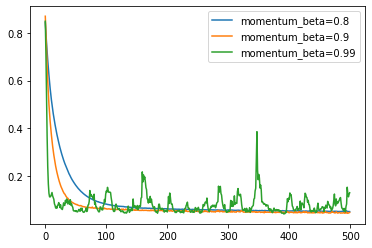

In [40]:
filtered_models = [
    model
    for model in models
    if model["hidden_layers"] == [32, 32] and model["l2_value"] == 0.01
]
for model in filtered_models:
    plt.plot(
        model["results"].history["loss"],
        label="momentum_beta={}".format(model["momentum_beta"]),
    )
plt.legend()
plt.show()

We can see that the model that converged fast and remained stable was with beta = 0.9.

### Study: Effect of L2 values
Fixing hidden_layers = [32, 32] and momentum beta = 0.9, ploting the loss by epoch of different L2 values:

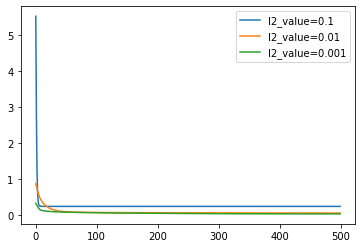

In [41]:
filtered_models = [
    model
    for model in models
    if model["hidden_layers"] == [32, 32] and model["momentum_beta"] == 0.9
]
for model in filtered_models:
    plt.plot(
        model["results"].history["loss"],
        label="l2_value={}".format(model["l2_value"]),
    )
plt.legend()
plt.show()

For this dataset we can see that L2 values of 0.01 and 0.001 in the end were overlapped, so both would be a great choice. But l2 = 0.001 converge a little bit faster